<p style="font-size:36px;text-align:center"> <b>Personalized Cancer diagnosis using Genetic Data (BOW Unigrams + Bigrams)</b> </p>

<h1>1. Business Problem</h1>

<h2>1.1. Description</h2>

<p> Source: https://www.kaggle.com/c/msk-redefining-cancer-treatment/ </p>
<p> Data: Memorial Sloan Kettering Cancer Center (MSKCC)</p>
<p> Download training_variants.zip and training_text.zip from Kaggle.</p> 

<h6> Context:</h6>
<p> Source: https://www.kaggle.com/c/msk-redefining-cancer-treatment/discussion/35336#198462</p>

<h6> Problem statement : </h6>
<p> Classify the given genetic variations/mutations based on evidence from text-based clinical literature. </p>

<h2>1.2. Source/Useful Links</h2>

 Some articles and reference blogs about the problem statement

1. https://www.forbes.com/sites/matthewherper/2017/06/03/a-new-cancer-drug-helped-almost-everyone-who-took-it-almost-heres-what-it-teaches-us/#2a44ee2f6b25
2. https://www.youtube.com/watch?v=UwbuW7oK8rk 
3. https://www.youtube.com/watch?v=qxXRKVompI8

<h2>1.3. Real-world/Business objectives and constraints.</h2>

* No low-latency requirement.
* Interpretability is important.
* Errors can be very costly.
* Probability of a data-point belonging to each class is needed.

<h1>2. Machine Learning Problem Formulation</h1>

<h2>2.1. Data</h2>

<h3>2.1.1. Data Overview</h3>

- Source: https://www.kaggle.com/c/msk-redefining-cancer-treatment/data
- We have two data files: one conatins the information about the genetic mutations and the other contains the clinical evidence (text) that  human experts/pathologists use to classify the genetic mutations. 
- Both these data files are have a common column called ID
- <p> 
    Data file's information:
    <ul> 
        <li>
        training_variants (ID , Gene, Variations, Class)
        </li>
        <li>
        training_text (ID, Text)
        </li>
    </ul>
</p>

<h3>2.1.2. Example Data Point</h3>

<h6>training_variants</h6>
<hr>
ID,Gene,Variation,Class<br>
0,FAM58A,Truncating Mutations,1 <br>
1,CBL,W802*,2 <br>
2,CBL,Q249E,2 <br>
...

<h6> training_text</h6>
<hr>
ID,Text <br>
0||Cyclin-dependent kinases (CDKs) regulate a variety of fundamental cellular processes. CDK10 stands out as one of the last orphan CDKs for which no activating cyclin has been identified and no kinase activity revealed. Previous work has shown that CDK10 silencing increases ETS2 (v-ets erythroblastosis virus E26 oncogene homolog 2)-driven activation of the MAPK pathway, which confers tamoxifen resistance to breast cancer cells. The precise mechanisms by which CDK10 modulates ETS2 activity, and more generally the functions of CDK10, remain elusive. Here we demonstrate that CDK10 is a cyclin-dependent kinase by identifying cyclin M as an activating cyclin. Cyclin M, an orphan cyclin, is the product of FAM58A, whose mutations cause STAR syndrome, a human developmental anomaly whose features include toe syndactyly, telecanthus, and anogenital and renal malformations. We show that STAR syndrome-associated cyclin M mutants are unable to interact with CDK10. Cyclin M silencing phenocopies CDK10 silencing in increasing c-Raf and in conferring tamoxifen resistance to breast cancer cells. CDK10/cyclin M phosphorylates ETS2 in vitro, and in cells it positively controls ETS2 degradation by the proteasome. ETS2 protein levels are increased in cells derived from a STAR patient, and this increase is attributable to decreased cyclin M levels. Altogether, our results reveal an additional regulatory mechanism for ETS2, which plays key roles in cancer and development. They also shed light on the molecular mechanisms underlying STAR syndrome.Cyclin-dependent kinases (CDKs) play a pivotal role in the control of a number of fundamental cellular processes (1). The human genome contains 21 genes encoding proteins that can be considered as members of the CDK family owing to their sequence similarity with bona fide CDKs, those known to be activated by cyclins (2). Although discovered almost 20 y ago (3, 4), CDK10 remains one of the two CDKs without an identified cyclin partner. This knowledge gap has largely impeded the exploration of its biological functions. CDK10 can act as a positive cell cycle regulator in some cells (5, 6) or as a tumor suppressor in others (7, 8). CDK10 interacts with the ETS2 (v-ets erythroblastosis virus E26 oncogene homolog 2) transcription factor and inhibits its transcriptional activity through an unknown mechanism (9). CDK10 knockdown derepresses ETS2, which increases the expression of the c-Raf protein kinase, activates the MAPK pathway, and induces resistance of MCF7 cells to tamoxifen (6). ... 

<h2>2.2. Mapping the real-world problem to an ML problem</h2>

<h3>2.2.1. Type of Machine Learning Problem</h3>

<p>
    
            There are nine different classes a genetic mutation can be classified into => Multi class classification problem
   
      
    
</p>

<h3>2.2.2. Performance Metric</h3>

Source: https://www.kaggle.com/c/msk-redefining-cancer-treatment#evaluation

Metric(s): 
* Multi class log-loss 
* Confusion matrix 


<h3>2.2.3. Machine Learing Objectives and Constraints</h3>

<p> Objective: Predict the probability of each data-point belonging to each of the nine classes.
</p>
<p> Constraints:
</p>
* Interpretability
* Class probabilities are needed.
* Penalize the errors in class probabilites => Metric is Log-loss.
* No Latency constraints.

<h2>2.3. Train, CV and Test Datasets</h2>

 Split the dataset randomly into three parts train, cross validation and test with 64%,16%, 20% of data respectively

<h1>3. Exploratory Data Analysis</h1>

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import numpy as np
from nltk.corpus import stopwords
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from imblearn.over_sampling import SMOTE
from collections import Counter
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings("ignore")
from mlxtend.classifier import StackingClassifier
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression

<h2>3.1. Reading Data</h2>

<h3>3.1.1. Reading Gene and Variation Data</h3>

In [4]:
data = pd.read_csv('training/training_variants')
print('Number of data points : ', data.shape[0])
print('Number of features : ', data.shape[1])
print('Features : ', data.columns.values)
data.head()

Number of data points :  3321
Number of features :  4
Features :  ['ID' 'Gene' 'Variation' 'Class']


,ID,Gene,Variation,Class
0,0,FAM58A,Truncating Mutations,1
1,1,CBL,W802*,2
2,2,CBL,Q249E,2
3,3,CBL,N454D,3
4,4,CBL,L399V,4


<p>
    training/training_variants is a comma separated file containing the description of the genetic mutations used for training. <br>
    Fields are 
    <ul>
        <li><b>ID : </b>the id of the row used to link the mutation to the clinical evidence</li>
        <li><b>Gene : </b>the gene where this genetic mutation is located </li>
        <li><b>Variation : </b>the aminoacid change for this mutations </li>
        <li><b>Class :</b> 1-9 the class this genetic mutation has been classified on</li>
    </ul>

<h3>3.1.2. Reading Text Data</h3>

In [5]:
# note '||' the seprator in this file
data_text =pd.read_csv("training/training_text",sep="\|\|",engine="python",names=["ID","TEXT"],skiprows=1)
print('Number of data points : ', data_text.shape[0])
print('Number of features : ', data_text.shape[1])
print('Features : ', data_text.columns.values)
data_text.head()

Number of data points :  3321
Number of features :  2
Features :  ['ID' 'TEXT']


,ID,TEXT
0,0,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,Abstract Background Non-small cell lung canc...
2,2,Abstract Background Non-small cell lung canc...
3,3,Recent evidence has demonstrated that acquired...
4,4,Oncogenic mutations in the monomeric Casitas B...


<h3>3.1.3. Getting number of sentences in each Text</h3>

In [6]:
#We will add a colum containing the approximate number of sentences in a literature
data_text['NumOfSent'] = data_text['TEXT'].apply(lambda sent : len(str(sent).split(".")))
data_text.head()

,ID,TEXT,NumOfSent
0,0,Cyclin-dependent kinases (CDKs) regulate a var...,398
1,1,Abstract Background Non-small cell lung canc...,317
2,2,Abstract Background Non-small cell lung canc...,317
3,3,Recent evidence has demonstrated that acquired...,225
4,4,Oncogenic mutations in the monomeric Casitas B...,323


In [7]:
data_text.NumOfSent.describe()

count    3321.000000
mean      572.594098
std       486.904970
min         1.000000
25%       260.000000
50%       427.000000
75%       744.000000
max      4850.000000
Name: NumOfSent, dtype: float64

<h3>3.1.4. Preprocessing of text</h3>

In [8]:
# loading stop words from nltk library
stop_words = set(stopwords.words('english'))


def nlp_preprocessing(total_text, index, column):
    if type(total_text) is not int:
        string = ""
        # replace every special char with space
        total_text = re.sub('[^a-zA-Z0-9\n]', ' ', total_text)
        # replace multiple spaces with single space
        total_text = re.sub('\s+',' ', total_text)
        # converting all the chars into lower-case.
        total_text = total_text.lower()
        
        for word in total_text.split():
        # if the word is a not a stop word then retain that word from the data
            if not word in stop_words:
                string += word + " "
        
        data_text[column][index] = string

In [9]:
#text processing stage.
start_time = time.clock()
for index, row in data_text.iterrows():
    if type(row['TEXT']) is str:
        nlp_preprocessing(row['TEXT'], index, 'TEXT')
    else:
        print("There is no text description for id:",index)
print('Time took for preprocessing the text :',time.clock() - start_time, "seconds")

There is no text description for id: 1109
There is no text description for id: 1277
There is no text description for id: 1407
There is no text description for id: 1639
There is no text description for id: 2755
Time took for preprocessing the text : 207.855983 seconds


In [10]:
#Merging both gene_variations and text data based on ID
result = pd.merge(data, data_text,on='ID', how='left')
result.head()

,ID,Gene,Variation,Class,TEXT,NumOfSent
0,0,FAM58A,Truncating Mutations,1,cyclin dependent kinases cdks regulate variety...,398
1,1,CBL,W802*,2,abstract background non small cell lung cancer...,317
2,2,CBL,Q249E,2,abstract background non small cell lung cancer...,317
3,3,CBL,N454D,3,recent evidence demonstrated acquired uniparen...,225
4,4,CBL,L399V,4,oncogenic mutations monomeric casitas b lineag...,323


In [11]:
#Check for null entries
result[result.isnull().any(axis=1)]

,ID,Gene,Variation,Class,TEXT,NumOfSent
1109,1109,FANCA,S1088F,1,NaN,1
1277,1277,ARID5B,Truncating Mutations,1,NaN,1
1407,1407,FGFR3,K508M,6,NaN,1
1639,1639,FLT1,Amplification,6,NaN,1
2755,2755,BRAF,G596C,7,NaN,1


In [12]:
#Replace the null entries in Text by Gene + Variation Data
result.loc[result['TEXT'].isnull(),'TEXT'] = result['Gene'] +' '+result['Variation']

In [13]:
#Display row after null replacement
result[result['ID']==1109]

,ID,Gene,Variation,Class,TEXT,NumOfSent
1109,1109,FANCA,S1088F,1,FANCA S1088F,1


In [14]:
#Display column names
result.columns

Index(['ID', 'Gene', 'Variation', 'Class', 'TEXT', 'NumOfSent'], dtype='object')

In [21]:
# Python program to find the k most frequent words in a given text
def freq_text(text,k):
    data_set = text
    from collections import Counter 
    split_it = data_set.split() 
    Counter = Counter(split_it) 
    most_occur = list(dict(Counter.most_common(k)).keys()) 
    most_occur_str = ' '.join(word for word in most_occur)
    return(most_occur_str)

#Merge the variation + Text features into one single text
#Remove unwanted words like "cell","line","et","all" etc
#I have plotted word cloud and saw that the words "cell","line","et","all","fig" occur in almost all the classes of cancers. So we will drop them. Because, they add no purpose to the model that we are designing.
#Remove * sign from Variants
#Convert everything in lower case
result["Gene"] = result["Gene"].apply(lambda x: x.lower())
result["Variation"] = result["Variation"].apply(lambda x: x.lower())
result["MergedText"] = result["Variation"].apply(lambda x: x.replace("*",'')) + " " + result["TEXT"].apply(lambda x : x.replace('cell','').replace('line','').replace('et','').replace('al','').replace('fig',''))
result["TopWordsInText"] = result["MergedText"].apply(lambda x: freq_text(str(x),75))

In [22]:
#Save the final dataframe to "result.csv"
result.to_csv("result.csv",columns=result.columns,index=None)

In [2]:
#Load the pre-processed data frame
result=pd.read_csv('result.csv')
result.head(5)

,ID,Gene,Variation,Class,TEXT,NumOfSent,MergedText,TopWordsInText
0,0,fam58a,truncating mutations,1,cyclin dependent kinases cdks regulate variety...,398,truncating mutations cyclin dependent kinases ...,cdk10 cyclin s2 1 s expression protein c level...
1,1,cbl,w802*,2,abstract background non small cell lung cancer...,317,w802 abstract background non sml lung cancer ...,c cbl mutations lung egfr mutation s 1 m sampl...
2,2,cbl,q249e,2,abstract background non small cell lung cancer...,317,q249e abstract background non sml lung cancer...,c cbl mutations lung egfr mutation s 1 m sampl...
3,3,cbl,n454d,3,recent evidence demonstrated acquired uniparen...,225,n454d recent evidence demonstrated acquired un...,cbl mutations cases aupd mutation 3 upn 2 ure ...
4,4,cbl,l399v,4,oncogenic mutations monomeric casitas b lineag...,323,l399v oncogenic mutations monomeric casitas b ...,cbl mutations cancer binding e2 stability acti...


<h3>3.1.5. Test, Train and Cross Validation Split</h3>

<h4>3.1.5.1. Splitting data into train, test and cross validation (64:20:16)</h4>

In [3]:
y_true = result['Class'].values
result.Gene      = result.Gene.str.replace('\s+', '_')
result.Variation = result.Variation.str.replace('\s+', '_')

# split the data into test and train by maintaining same distribution of output varaible 'y_true' [stratify=y_true]
X_train, test_df, y_train, y_test = train_test_split(result, y_true, stratify=y_true, test_size=0.2, random_state=0)
# split the train data into train and cross validation by maintaining same distribution of output varaible 'y_train' [stratify=y_train]
train_df, cv_df, y_train, y_cv = train_test_split(X_train, y_train, stratify=y_train, test_size=0.2, random_state=0)

In [4]:
train_df.head()

,ID,Gene,Variation,Class,TEXT,NumOfSent,MergedText,TopWordsInText
1703,1703,pms2,e541k,5,identification high risk disease causing const...,304,e541k identification high risk disease causing...,variants classification class data variant pat...
1284,1284,hras,g13r,2,three dimensional structure complex human h ra...,666,g13r three dimension structure complex human h...,ras oncogenic gap s 334 so 2 activation 1 pro ...
3208,3208,rb1,c712r,5,abstract certain kindreds low penetrant lp ret...,148,c712r abstract certain kindreds low penrant lp...,rb s lp protein wt r661w mutant activity leles...
2125,2125,ccnd1,t286i,7,activities cyclin dependent kinases serve inte...,1293,t286i activities cyclin dependent kinases serv...,d1 cyclin s 3 gsk nuclear phosphorylation 286 ...
476,476,tp53,p152l,1,abstract purpose adrenocortical carcinoma acc ...,204,p152l abstract purpose adrenocortic carcinoma ...,tp53 acc mutations patients mutation children ...


<p> We split the data into train, test and cross validation data sets, preserving the ratio of class distribution in the original data set  </p>

In [5]:
print('Number of data points in train data:', train_df.shape[0])
print('Number of data points in test data:', test_df.shape[0])
print('Number of data points in cross validation data:', cv_df.shape[0])

Number of data points in train data: 2124
Number of data points in test data: 665
Number of data points in cross validation data: 532


<h4>3.1.5.2. Distribution of y_i's in Train, Test and Cross Validation datasets</h4>

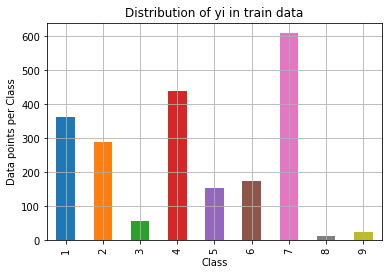

Number of data points in class 7 : 609 ( 28.672 %)
Number of data points in class 4 : 439 ( 20.669 %)
Number of data points in class 1 : 363 ( 17.09 %)
Number of data points in class 2 : 289 ( 13.606 %)
Number of data points in class 6 : 176 ( 8.286 %)
Number of data points in class 5 : 155 ( 7.298 %)
Number of data points in class 3 : 57 ( 2.684 %)
Number of data points in class 9 : 24 ( 1.13 %)
Number of data points in class 8 : 12 ( 0.565 %)
--------------------------------------------------------------------------------


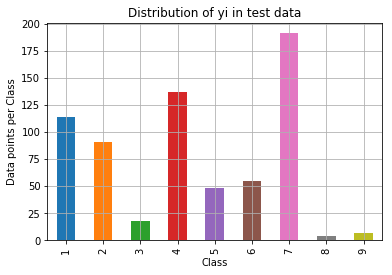

Number of data points in class 7 : 191 ( 28.722 %)
Number of data points in class 4 : 137 ( 20.602 %)
Number of data points in class 1 : 114 ( 17.143 %)
Number of data points in class 2 : 91 ( 13.684 %)
Number of data points in class 6 : 55 ( 8.271 %)
Number of data points in class 5 : 48 ( 7.218 %)
Number of data points in class 3 : 18 ( 2.707 %)
Number of data points in class 9 : 7 ( 1.053 %)
Number of data points in class 8 : 4 ( 0.602 %)
--------------------------------------------------------------------------------


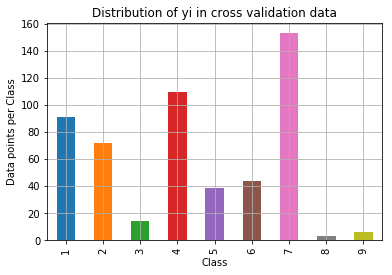

Number of data points in class 7 : 153 ( 28.759 %)
Number of data points in class 4 : 110 ( 20.677 %)
Number of data points in class 1 : 91 ( 17.105 %)
Number of data points in class 2 : 72 ( 13.534 %)
Number of data points in class 6 : 44 ( 8.271 %)
Number of data points in class 5 : 39 ( 7.331 %)
Number of data points in class 3 : 14 ( 2.632 %)
Number of data points in class 9 : 6 ( 1.128 %)
Number of data points in class 8 : 3 ( 0.564 %)


In [6]:
# it returns a dict, keys as class labels and values as the number of data points in that class
train_class_distribution = train_df['Class'].value_counts().sortlevel()
test_class_distribution = test_df['Class'].value_counts().sortlevel()
cv_class_distribution = cv_df['Class'].value_counts().sortlevel()

my_colors = 'rgbkymc'
train_class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in train data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',train_class_distribution.values[i], '(', np.round((train_class_distribution.values[i]/train_df.shape[0]*100), 3), '%)')

    
print('-'*80)
my_colors = 'rgbkymc'
test_class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in test data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-test_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',test_class_distribution.values[i], '(', np.round((test_class_distribution.values[i]/test_df.shape[0]*100), 3), '%)')

print('-'*80)
my_colors = 'rgbkymc'
cv_class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in cross validation data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',cv_class_distribution.values[i], '(', np.round((cv_class_distribution.values[i]/cv_df.shape[0]*100), 3), '%)')

### Key Take-away: 
We can see the class labels are distributed fairly equally in all the three dataset - train, cross validation and test data. If it hadn't been the case our models won't perform good. The distributions has to be similar in all the three datasets for all the 9 classes.

<h3>3.1.6. Draw word clouds to check for the most frequently occuring words in each classes in train data</h3>

100%|██████████| 9/9 [01:20<00:00,  7.53s/it]


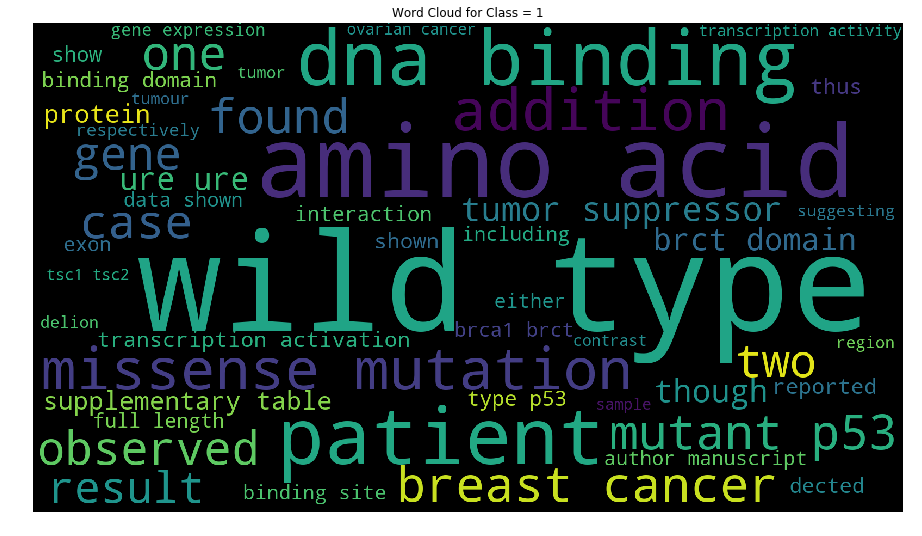

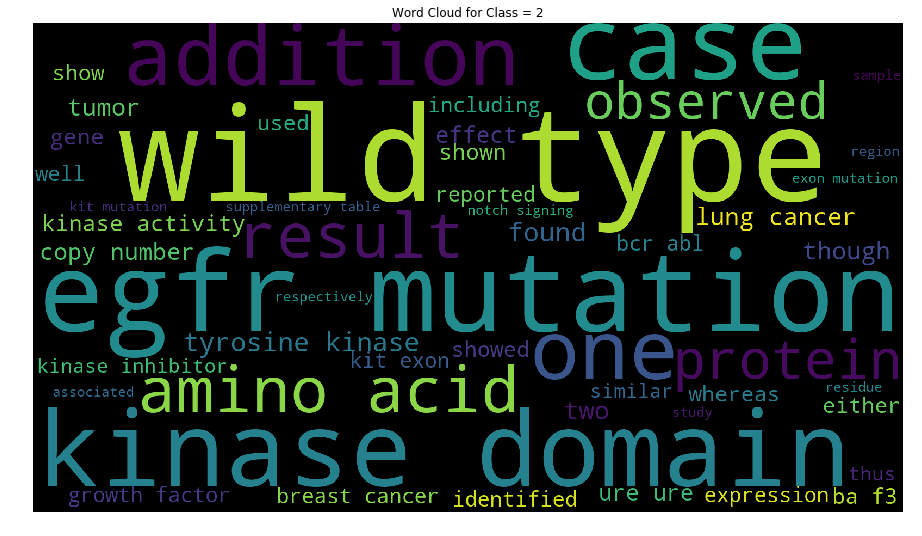

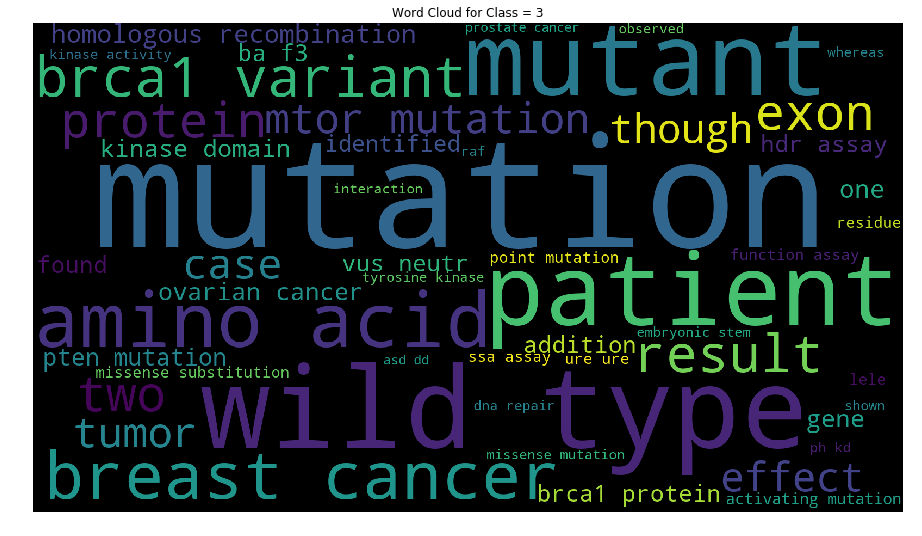

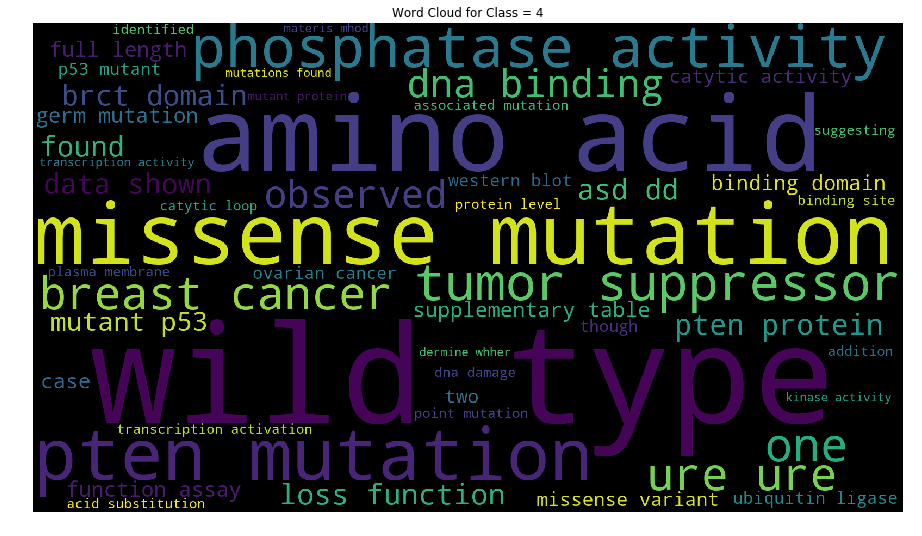

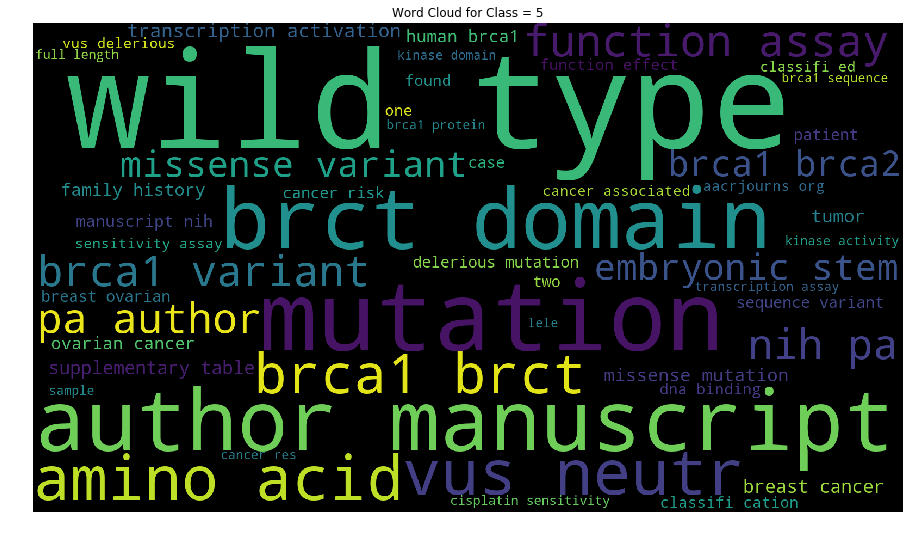

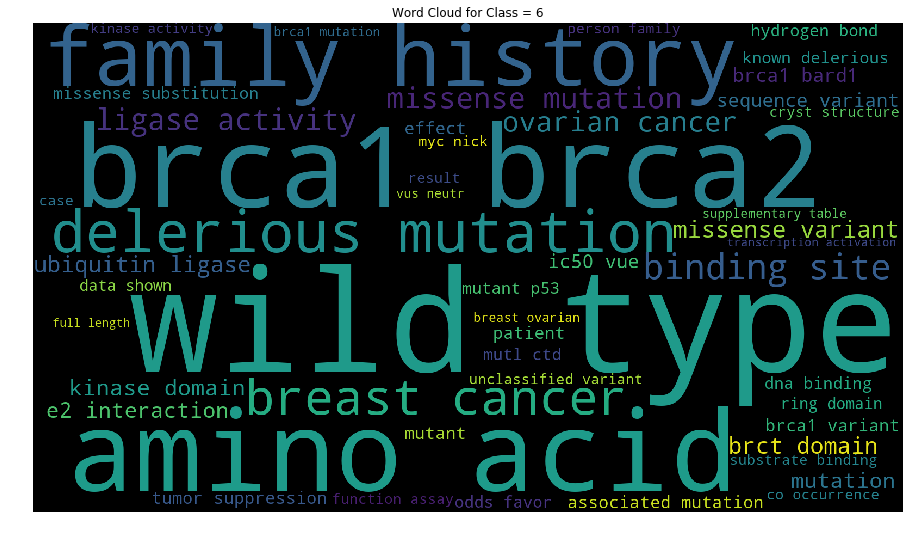

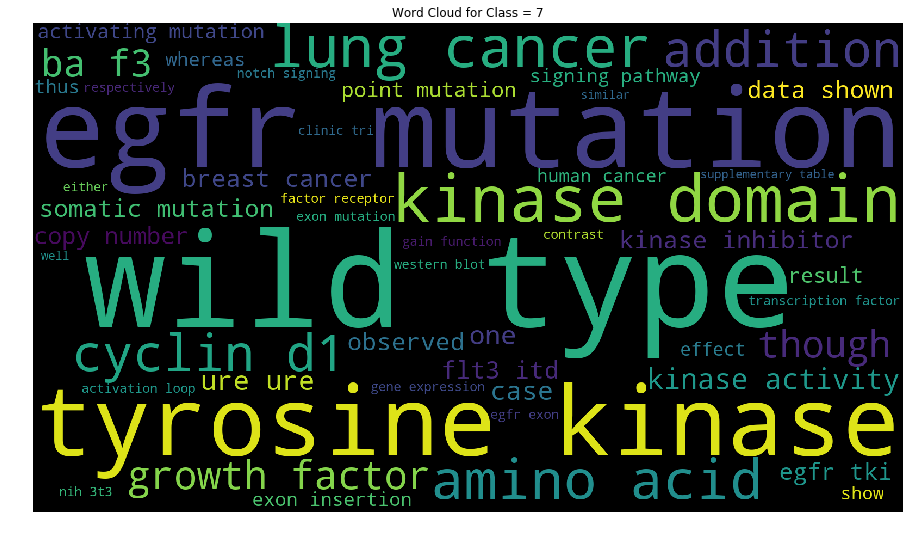

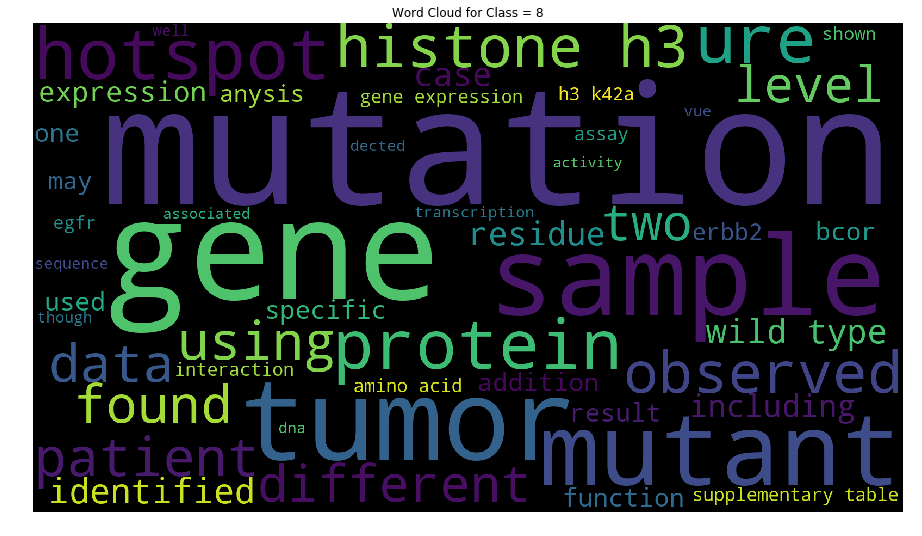

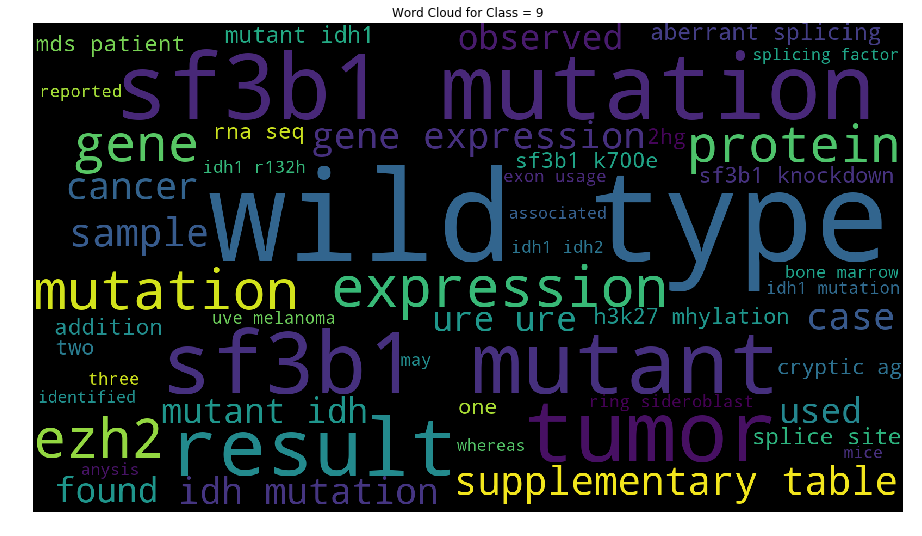

In [7]:
from tqdm import tqdm
from wordcloud import WordCloud
for i in tqdm(range(1,len(train_df.Class.unique())+1)):
    cloud = WordCloud(prefer_horizontal=1,width=1600, height=900,max_words=50).generate(" ".join(train_df[train_df.Class == i]['MergedText']))
    cloud.to_file("wordclouds/Class{}.jpg".format(str(i)))
    plt.figure(figsize=(16,9))
    plt.imshow(cloud)
    plt.axis('off')
    ax = plt.axes()
    ax.set_title('Word Cloud for Class = {}'.format(i))

If we look at the above word cloud, we can straight away see some keywords which tells us what a particular class is all about. For example we see keywords like "breast cancer", "lung cancer", "ovarian cancer", "gene mutation", "tyrosie kinase", "egfr mutation","amino acids" and so on, belonging to each of the classes. Here I have given just a few examples. We also see that there are some classes which talks about some particular variation/mutant type more frequently than others. One important conclusion that we can draw from the word cloud is that bigrams are very important for this problem, since words which occurs in pairs adds great insight in our diagnosis. As we have seen the occurrences of bigrams words like "breast cancer","lung cancer" etc.

### Oversampling using SMOTE

In [3]:
from imblearn.over_sampling import SVMSMOTE
resampler = SVMSMOTE(sampling_strategy='minority', random_state=0)
train_df,y_train=resampler.fit(train_df,y_train)
train_df, cv_df, y_train, y_cv = train_test_split(X_train, y_train, stratify=y_train, test_size=0.2)

<h2>3.2 Prediction using a 'Random' Model</h2>

<p style="font-size:16px"> In a 'Random' Model, we generate the NINE class probabilites randomly such that they sum to 1. </p>

In [12]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    
    #C = Actual confusion matrix
    #B = Recall matrix
    #C = Precision Matrix
    labels = [1,2,3,4,5,6,7,8,9]
    # representing A in heatmap format
    print("-"*20, "Confusion matrix", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(C, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

    print("-"*20, "Precision matrix (Columm Sum=1)", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(B, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    
    # representing B in heatmap format
    print("-"*20, "Recall matrix (Row sum=1)", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(A, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

Log loss on Cross Validation Data using Random Model 2.4344936801717685

Log loss on Test Data using Random Model 2.4434794658164782
-------------------- Confusion matrix --------------------


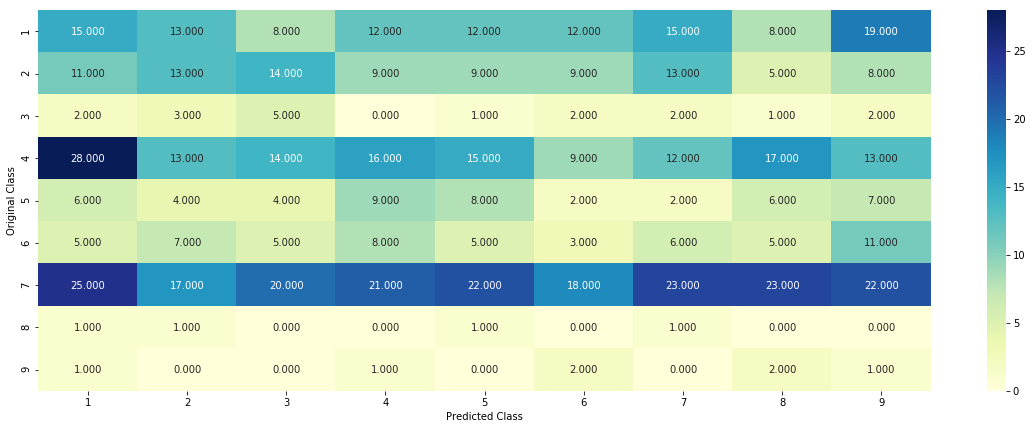

-------------------- Precision matrix (Columm Sum=1) --------------------


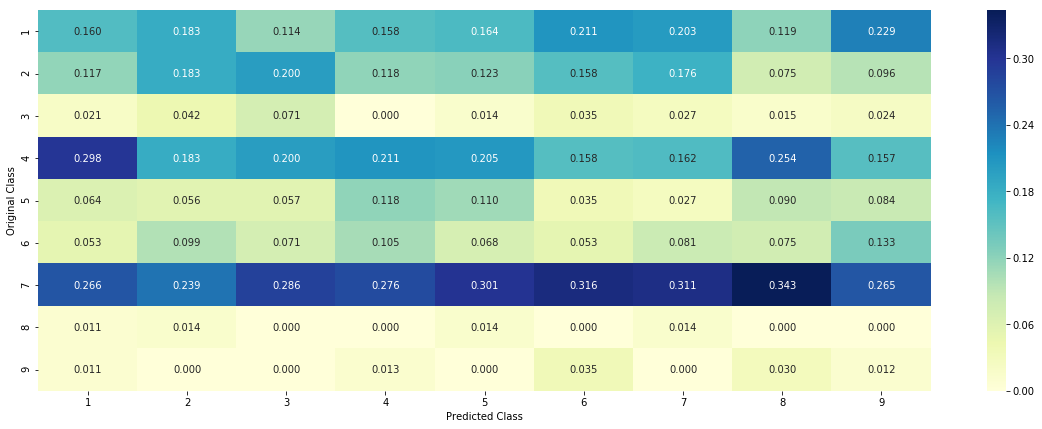

-------------------- Recall matrix (Row sum=1) --------------------


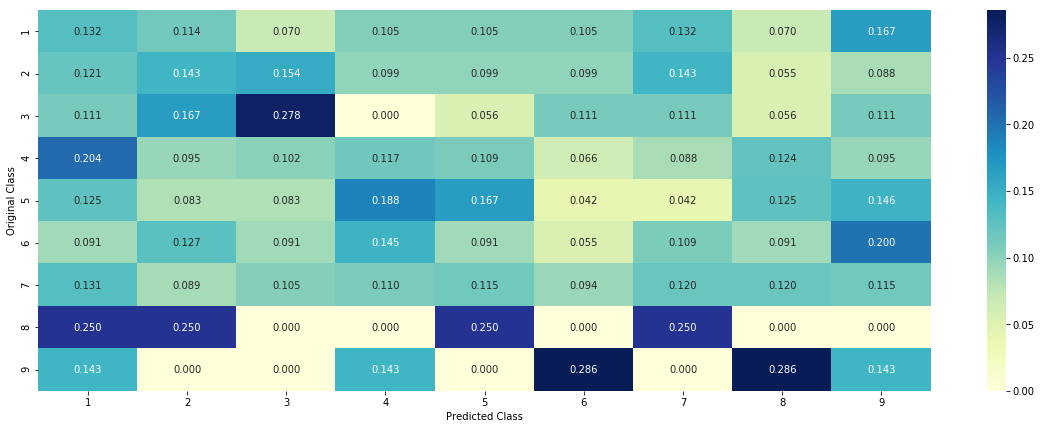

In [13]:
# we need to generate 9 numbers and the sum of numbers should be 1
# one solution is to genarate 9 numbers and divide each of the numbers by their sum
# ref: https://stackoverflow.com/a/18662466/4084039
test_data_len = test_df.shape[0]
cv_data_len = cv_df.shape[0]

# we create a output array that has exactly same size as the CV data
cv_predicted_y = np.zeros((cv_data_len,9))
for i in range(cv_data_len):
    rand_probs = np.random.rand(1,9)
    cv_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Cross Validation Data using Random Model",log_loss(y_cv,cv_predicted_y, eps=1e-15))
print()


# Test-Set error.
#we create a output array that has exactly same as the test data
test_predicted_y = np.zeros((test_data_len,9))
for i in range(test_data_len):
    rand_probs = np.random.rand(1,9)
    test_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(y_test,test_predicted_y, eps=1e-15))

predicted_y =np.argmax(test_predicted_y, axis=1)
plot_confusion_matrix(y_test, predicted_y+1)

<h2>3.3 Univariate Analysis</h2>

In [14]:
# code for response coding with Laplace smoothing.
# alpha : used for laplace smoothing
# feature: ['gene', 'variation']
# df: ['train_df', 'test_df', 'cv_df']
# algorithm
# ----------
# Consider all unique values and the number of occurances of a given feature in train data dataframe
# build a vector (1*9) , the first element = (number of times it occured in class1 + 10*alpha / number of time it occurred in total data+90*alpha)
# gv_dict is like a look up table, for every gene it store a (1*9) representation of it
# for a value of feature in df:
# if it is in train data:
# we add the vector that was stored in 'gv_dict' look up table to 'gv_fea'
# if it is not there is train:
# we add [1/9, 1/9, 1/9, 1/9,1/9, 1/9, 1/9, 1/9, 1/9] to 'gv_fea'
# return 'gv_fea'
# ----------------------

# get_gv_fea_dict: Get Gene varaition Feature Dict
def get_gv_fea_dict(alpha, feature, df):
    # value_count: it contains a dict like
    # print(train_df['Gene'].value_counts())
    # output:
    #        {BRCA1      174
    #         TP53       106
    #         EGFR        86
    #         BRCA2       75
    #         PTEN        69
    #         KIT         61
    #         BRAF        60
    #         ERBB2       47
    #         PDGFRA      46
    #         ...}
    # print(train_df['Variation'].value_counts())
    # output:
    # {
    # Truncating_Mutations                     63
    # Deletion                                 43
    # Amplification                            43
    # Fusions                                  22
    # Overexpression                            3
    # E17K                                      3
    # Q61L                                      3
    # S222D                                     2
    # P130S                                     2
    # ...
    # }
    value_count = train_df[feature].value_counts()
    
    # gv_dict : Gene Variation Dict, which contains the probability array for each gene/variation
    gv_dict = dict()
    
    #Denominator will contain the number of time that particular feature occured in whole data
    # i = feature name, denominator = feature count
    for i, denominator in value_count.items():
        # vec will contain (p(yi==1/Gi) probability of gene/variation belongs to perticular class
        # vec is 9 dimensional vector
        vec = []
        for k in range(1,10):
            # print(train_df.loc[(train_df['Class']==1) & (train_df['Gene']=='BRCA1')])
            #         ID   Gene             Variation  Class  
            # 2470  2470  BRCA1                S1715C      1   
            # 2486  2486  BRCA1                S1841R      1   
            # 2614  2614  BRCA1                   M1R      1   
            # 2432  2432  BRCA1                L1657P      1   
            # 2567  2567  BRCA1                T1685A      1   
            # 2583  2583  BRCA1                E1660G      1   
            # 2634  2634  BRCA1                W1718L      1   
            # cls_cnt.shape[0] will return the number of rows

            cls_cnt = train_df.loc[(train_df['Class']==k) & (train_df[feature]==i)]
            
            # cls_cnt.shape[0](numerator) will contain the number of time that particular feature occured in the dataset of class 1(Let)
            vec.append((cls_cnt.shape[0] + alpha*10)/ (denominator + 90*alpha))

        # we are adding the gene/variation to the dict as key and vec as value
        gv_dict[i]=vec
    return gv_dict

# Get Gene variation feature
def get_gv_feature(alpha, feature, df):
    # print(gv_dict)
    #     {'BRCA1': [0.20075757575757575, 0.03787878787878788, 0.068181818181818177, 0.13636363636363635, 0.25, 0.19318181818181818, 0.03787878787878788, 0.03787878787878788, 0.03787878787878788], 
    #      'TP53': [0.32142857142857145, 0.061224489795918366, 0.061224489795918366, 0.27040816326530615, 0.061224489795918366, 0.066326530612244902, 0.051020408163265307, 0.051020408163265307, 0.056122448979591837], 
    #      'EGFR': [0.056818181818181816, 0.21590909090909091, 0.0625, 0.068181818181818177, 0.068181818181818177, 0.0625, 0.34659090909090912, 0.0625, 0.056818181818181816], 
    #      'BRCA2': [0.13333333333333333, 0.060606060606060608, 0.060606060606060608, 0.078787878787878782, 0.1393939393939394, 0.34545454545454546, 0.060606060606060608, 0.060606060606060608, 0.060606060606060608], 
    #      'PTEN': [0.069182389937106917, 0.062893081761006289, 0.069182389937106917, 0.46540880503144655, 0.075471698113207544, 0.062893081761006289, 0.069182389937106917, 0.062893081761006289, 0.062893081761006289], 
    #      'KIT': [0.066225165562913912, 0.25165562913907286, 0.072847682119205295, 0.072847682119205295, 0.066225165562913912, 0.066225165562913912, 0.27152317880794702, 0.066225165562913912, 0.066225165562913912], 
    #      'BRAF': [0.066666666666666666, 0.17999999999999999, 0.073333333333333334, 0.073333333333333334, 0.093333333333333338, 0.080000000000000002, 0.29999999999999999, 0.066666666666666666, 0.066666666666666666],
    #      ...
    #     }
    gv_dict = get_gv_fea_dict(alpha, feature, df)
    # value_count is similar in get_gv_fea_dict
    value_count = train_df[feature].value_counts()
    
    # gv_fea: Gene_variation feature, it will contain the feature for each feature value in the data
    gv_fea = []
    # for every feature values in the given data frame we will check if it is there in the train data then we will add the feature to gv_fea
    # if not we will add [1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9] to gv_fea
    for index, row in df.iterrows():
        if row[feature] in dict(value_count).keys():
            gv_fea.append(gv_dict[row[feature]])
        else:
            gv_fea.append([1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9])
#             gv_fea.append([-1,-1,-1,-1,-1,-1,-1,-1,-1])
    return gv_fea

When we caculate the probability of a feature belongs to any particular class, we apply laplace smoothing
<li>(numerator + 10\*alpha) / (denominator + 90\*alpha) </li>

<h3>3.2.1 Univariate Analysis on Gene Feature</h3>

<p style="font-size:18px;"> <b>Q1.</b> Gene, What type of feature it is ?</p>
<p style="font-size:16px;"><b>Ans.</b> Gene is a categorical variable </p>
<p style="font-size:18px;"> <b>Q2.</b> How many categories are there and How they are distributed?</p>

In [15]:
unique_genes = train_df['Gene'].value_counts()
print('Number of Unique Genes in train data:', unique_genes.shape[0])
# the top 10 genes that occured most
print(unique_genes.head(10))

Number of Unique Genes in train data: 226
brca1    169
tp53     101
egfr      94
pten      85
brca2     77
kit       59
braf      58
erbb2     46
alk       41
fgfr2     40
Name: Gene, dtype: int64


In [16]:
print("Ans: There are", unique_genes.shape[0] ,"different categories of genes in the training data, and they are distibuted as follows",)

Ans: There are 226 different categories of genes in the training data, and they are distibuted as follows


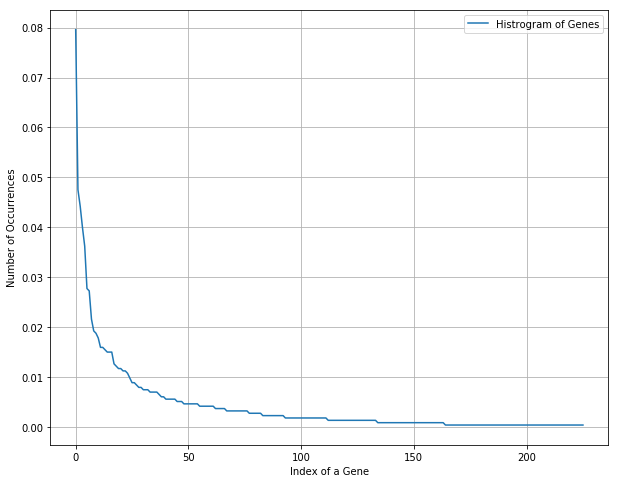

In [17]:
#Histogram of distribution of genes
s = sum(unique_genes.values);
h = unique_genes.values/s;
plt.figure(figsize=(10,8))
plt.plot(h, label="Histrogram of Genes")
plt.xlabel('Index of a Gene')
plt.ylabel('Number of Occurrences')
plt.legend()
plt.grid()
plt.show()

#### Key Take-away from the above Histogram: 
The dsitributions of the gene is very skewed towards the left. There are almost 50 genes which occurs most frequently, and there are almost 200 odd genes which occurs less frequently than the first 50.

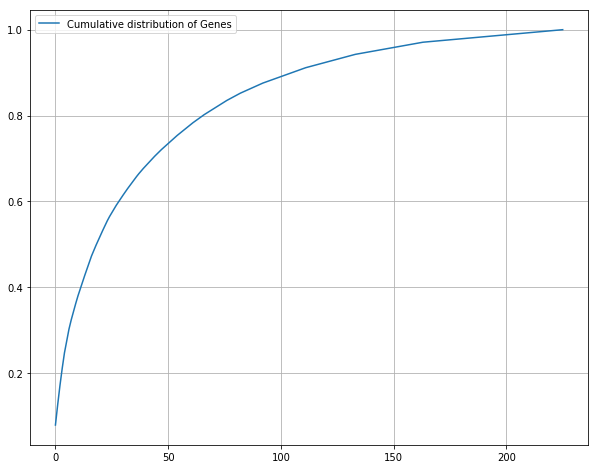

In [18]:
#Get the CDF of gene
c = np.cumsum(h)
plt.figure(figsize=(10,8))
plt.plot(c,label='Cumulative distribution of Genes')
plt.grid()
plt.legend()
plt.show()

#### Key Take-away from the above CDF Plot: 
The top 50 genes contribute to almost 75% of our data. The rest of the 185 genes contribute to only 25% of the data. This says that the top 50% gene mutation type occurs most frquently. There are also many gene/mutation pair types which occurs very less frequently.

<p style="font-size:18px;"> <b>Q3.</b> How to featurize this Gene feature ?</p>

<p style="font-size:16px;"><b>Ans.</b>there are two ways we can featurize this variable
check out this video: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/
<ol><li>One hot Encoding</li><li>Response coding</li></ol></p>
<p> We will choose the appropriate featurization based on the ML model we use.  For this problem of multi-class classification with categorical features, one-hot encoding is better for Logistic regression while response coding is better for Random Forests. </p>

In [21]:
#response-coding of the Gene feature
# alpha is used for laplace smoothing
alpha = 1
train_gene_feature_responseCoding = np.array(get_gv_feature(alpha, "Gene", train_df)) # train gene feature
test_gene_feature_responseCoding = np.array(get_gv_feature(alpha, "Gene", test_df)) # test gene feature
cv_gene_feature_responseCoding = np.array(get_gv_feature(alpha, "Gene", cv_df)) # cross validation gene feature

print("train_gene_feature_responseCoding is converted to a feature vector using respone coding method. The shape of gene feature:", train_gene_feature_responseCoding.shape)
print("test_gene_feature_responseCoding is converted to a feature vector using respone coding method. The shape of gene feature:", test_gene_feature_responseCoding.shape)
print("cv_gene_feature_responseCoding is converted to a feature vector using respone coding method. The shape of gene feature:", cv_gene_feature_responseCoding.shape)

train_gene_feature_responseCoding is converted to a feature vector using respone coding method. The shape of gene feature: (2124, 9)
test_gene_feature_responseCoding is converted to a feature vector using respone coding method. The shape of gene feature: (665, 9)
cv_gene_feature_responseCoding is converted to a feature vector using respone coding method. The shape of gene feature: (532, 9)


In [58]:
# one-hot encoding of Gene feature.
gene_vectorizer = TfidfVectorizer()
train_gene_feature_ngrams = gene_vectorizer.fit_transform(train_df['Gene'])
test_gene_feature_ngrams = gene_vectorizer.transform(test_df['Gene'])
cv_gene_feature_ngrams = gene_vectorizer.transform(cv_df['Gene'])

print("train_gene_feature_ngrams is converted to a feature vector using one-hot coding method. The shape of gene feature:", train_gene_feature_ngrams.shape)
print("test_gene_feature_ngrams is converted to a feature vector using one-hot coding method. The shape of gene feature:", test_gene_feature_ngrams.shape)
print("cv_gene_feature_ngrams is converted to a feature vector using one-hot coding method. The shape of gene feature:", cv_gene_feature_ngrams.shape)

train_gene_feature_ngrams is converted to a feature vector using one-hot coding method. The shape of gene feature: (2124, 225)
test_gene_feature_ngrams is converted to a feature vector using one-hot coding method. The shape of gene feature: (665, 225)
cv_gene_feature_ngrams is converted to a feature vector using one-hot coding method. The shape of gene feature: (532, 225)


<p style="font-size:18px;"> <b>Q4.</b> How good is this gene feature  in predicting y_i?</p>

There are many ways to estimate how good a feature is, in predicting y_i. One of the good methods is to build a proper ML model using just this feature. In this case, we will build a logistic regression model using only Gene feature (one hot encoded) to predict y_i.

For values of alpha =  1e-05 The log loss is: 1.3870468447618116
For values of alpha =  0.0001 The log loss is: 1.2159741721811521
For values of alpha =  0.001 The log loss is: 1.2409499117374159
For values of alpha =  0.01 The log loss is: 1.3471077827397941
For values of alpha =  0.1 The log loss is: 1.4655295368185326
For values of alpha =  1 The log loss is: 1.5070498610818233


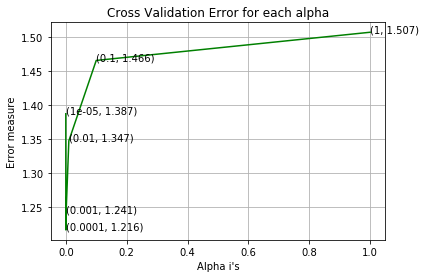

For values of best alpha =  0.0001 The train log loss is: 1.0505172190473846
For values of best alpha =  0.0001 The cross validation log loss is: 1.2159741721811521
For values of best alpha =  0.0001 The test log loss is: 1.1824833977922369


In [59]:
alpha = [10 ** x for x in range(-5, 1)] # hyperparam for SGD classifier.

cv_log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_gene_feature_ngrams, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_gene_feature_ngrams, y_train)
    predict_y = sig_clf.predict_proba(cv_gene_feature_ngrams)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_gene_feature_ngrams, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_gene_feature_ngrams, y_train)

predict_y = sig_clf.predict_proba(train_gene_feature_ngrams)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_gene_feature_ngrams)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_gene_feature_ngrams)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


<p style="font-size:18px;"> <b>Q5.</b> Is the Gene feature stable across all the data sets (Test, Train, Cross validation)?</p>
<p style="font-size:16px;"> <b>Ans.</b> Yes, it is. Otherwise, the CV and Test errors would be significantly more than train error. </p>

In [25]:
print("Q6. How many data points in Test and CV datasets are covered by the ", unique_genes.shape[0], " genes in train dataset?\n")

test_coverage=test_df[test_df['Gene'].isin(list(set(train_df['Gene'])))].shape[0]
cv_coverage=cv_df[cv_df['Gene'].isin(list(set(train_df['Gene'])))].shape[0]

print('Ans.\n1. In test data',test_coverage, 'out of',test_df.shape[0], ":",(test_coverage/test_df.shape[0])*100)
print('2. In cross validation data',cv_coverage, 'out of ',cv_df.shape[0],":" ,(cv_coverage/cv_df.shape[0])*100)

Q6. How many data points in Test and CV datasets are covered by the  226  genes in train dataset?

Ans.
1. In test data 643 out of 665 : 96.69172932330827
2. In cross validation data 508 out of  532 : 95.48872180451127


<h3>3.2.2 Univariate Analysis on Variation Feature</h3>

<p style="font-size:18px;"> <b>Q7.</b> Variation, What type of feature is it ?</p>
<p style="font-size:16px;"><b>Ans.</b> Variation is a categorical variable </p>
<p style="font-size:18px;"> <b>Q8.</b> How many categories are there?</p>

In [26]:
unique_variations = train_df['Variation'].value_counts()
print('Number of Unique Variations :', unique_variations.shape[0])
# the top 10 variations that occured most
print(unique_variations.head(10))

Number of Unique Variations : 1929
truncating_mutations    55
amplification           48
deletion                44
fusions                 27
g12v                     3
t167a                    2
p130s                    2
g12c                     2
f384l                    2
v321m                    2
Name: Variation, dtype: int64


In [27]:
print("Ans: There are", unique_variations.shape[0] ,"different categories of variations in the train data, and they are distibuted as follows",)

Ans: There are 1929 different categories of variations in the train data, and they are distibuted as follows


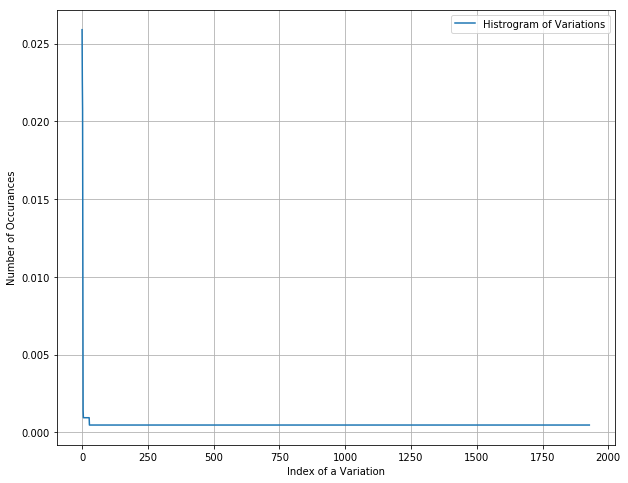

In [28]:
#Histogram for the distribution of the fetaure Variation
plt.figure(figsize=(10,8))
s = sum(unique_variations.values);
h = unique_variations.values/s;
plt.plot(h, label="Histrogram of Variations")
plt.xlabel('Index of a Variation')
plt.ylabel('Number of Occurances')
plt.legend()
plt.grid()
plt.show()

#### Key Take-aways:

The distribtion is highly skewed. This means there are extremely small number of variations which have a significant higher value. Also, most variations doesn't occur more than once. Most of the variations occurs 1 or less number of times.

[0.02589454 0.04849341 0.06920904 ... 0.99905838 0.99952919 1.        ]


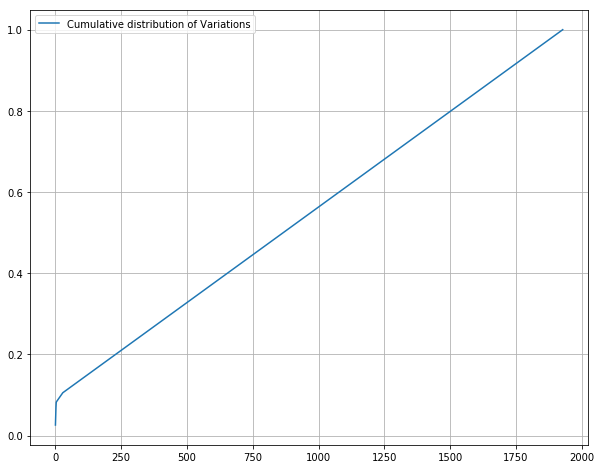

In [29]:
#CDF Of variation feature
plt.figure(figsize=(10,8))
c = np.cumsum(h)
print(c)
plt.plot(c,label='Cumulative distribution of Variations')
plt.grid()
plt.legend()
plt.show()

#### Key Take-aways:

This CDF suggest that almost 80% of the dataset is explained by 1500 variations (out of a total number of 1927). If you see a CDF which is almost a straight line, you can quickly tell that most variations occur once or maybe twice in the entire training data.

<p style="font-size:18px;"> <b>Q9.</b> How to featurize this Variation feature ?</p>

<p style="font-size:16px;"><b>Ans.</b>There are two ways we can featurize this variable
check out this video: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/
<ol><li>One hot Encoding</li><li>Response coding</li></ol></p>
<p> We will be using both these methods to featurize the Variation Feature </p>

### Very Important note about response coding: Avoiding response leakage.

1. We have to be extremely careful not to use the test and cross validate data for response coding. This is because we don't the issue of data leakage.
2. Suppose we have a variant V2 present in Test / Cross Val dataset. But V2 is not present in Train. So in that case, while building the response bales for V2, we will just assign equal probability values to each of the 9 array values. Proba = 1/9 for each og them. 
3. We will take the help of laplace smoothing in order to achieve this. Without laplace smoothing, we would get a 0/0 error. 
4. We are seeing the data that is present in the cross validation and test data during the time of training. So we are literally leaking the information that is present in test/cv data at the time of training.

This should be strictly avoided, as we do not want a data leakage issue.

In [30]:
alpha = 1 # alpha is used for laplace smoothing (Naive Bayes)
train_variation_feature_responseCoding = np.array(get_gv_feature(alpha, "Variation", train_df)) # train gene feature
test_variation_feature_responseCoding = np.array(get_gv_feature(alpha, "Variation", test_df)) # test gene feature
cv_variation_feature_responseCoding = np.array(get_gv_feature(alpha, "Variation", cv_df)) # cross validation gene feature

print("train_variation_feature_responseCoding is a converted feature using the response coding method. The shape of Variation feature:", train_variation_feature_responseCoding.shape)
print("test_variation_feature_responseCoding is a converted feature using the response coding method. The shape of Variation feature:", test_variation_feature_responseCoding.shape)
print("cv_variation_feature_responseCoding is a converted feature using the response coding method. The shape of Variation feature:", cv_variation_feature_responseCoding.shape)

train_variation_feature_responseCoding is a converted feature using the response coding method. The shape of Variation feature: (2124, 9)
test_variation_feature_responseCoding is a converted feature using the response coding method. The shape of Variation feature: (665, 9)
cv_variation_feature_responseCoding is a converted feature using the response coding method. The shape of Variation feature: (532, 9)


In [60]:
# one-hot encoding of variation feature.
variation_vectorizer = TfidfVectorizer()
train_variation_feature_ngrams = variation_vectorizer.fit_transform(train_df['Variation'])
test_variation_feature_ngrams = variation_vectorizer.transform(test_df['Variation'])
cv_variation_feature_ngrams = variation_vectorizer.transform(cv_df['Variation'])

print("train_variation_feature_ngrams is converted feature using the one-hot encoding method. The shape of Variation feature:", train_variation_feature_ngrams.shape)
print("test_variation_feature_ngrams is converted feature using the one-hot encoding method. The shape of Variation feature:", test_variation_feature_ngrams.shape)
print("cv_variation_feature_ngrams is converted feature using the one-hot encoding method. The shape of Variation feature:", cv_variation_feature_ngrams.shape)

train_variation_feature_ngrams is converted feature using the one-hot encoding method. The shape of Variation feature: (2124, 1956)
test_variation_feature_ngrams is converted feature using the one-hot encoding method. The shape of Variation feature: (665, 1956)
cv_variation_feature_ngrams is converted feature using the one-hot encoding method. The shape of Variation feature: (532, 1956)


<p style="font-size:18px;"> <b>Q10.</b> How good is this Variation feature  in predicting y_i?</p>

Let's build a model just like the earlier!

For values of alpha =  1e-05 The log loss is: 1.7154381050255847
For values of alpha =  0.0001 The log loss is: 1.7056097745741632
For values of alpha =  0.001 The log loss is: 1.7039972310910187
For values of alpha =  0.01 The log loss is: 1.7117196224961149
For values of alpha =  0.1 The log loss is: 1.7196167412892096
For values of alpha =  1 The log loss is: 1.722439066847416


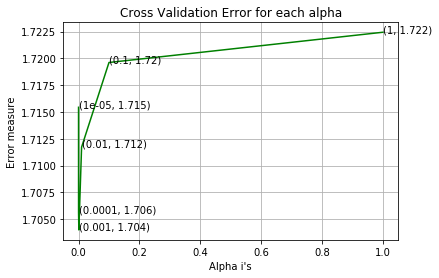

For values of best alpha =  0.001 The train log loss is: 1.0707361074178845
For values of best alpha =  0.001 The cross validation log loss is: 1.7039972310910187
For values of best alpha =  0.001 The test log loss is: 1.712042060813422


In [61]:
alpha = [10 ** x for x in range(-5, 1)]

cv_log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_variation_feature_ngrams, y_train)
    
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_variation_feature_ngrams, y_train)
    predict_y = sig_clf.predict_proba(cv_variation_feature_ngrams)
    
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_variation_feature_ngrams, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_variation_feature_ngrams, y_train)

predict_y = sig_clf.predict_proba(train_variation_feature_ngrams)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_variation_feature_ngrams)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_variation_feature_ngrams)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

#### Conclusion:

1. The variation feature is certainly useful in determining the class labels, as it has brought down the log loss of a random model by a significant level.

2. However, if we compare the test and cross validation log loss of variation features to that of the gene features, we see that test/cross validation log loss for variations is quite high as compared to genes. This suggests that the variation feature might be unstable. 

3. Also, there is a significant difference in log loss for train and test/cross-validation. This means the model is overfitting using only the variation feature.

4. Having said all these, we will still keep the variation feature as it has managed to decrease the log-loss of a random model. We will use this feature along with other features to see how it behaves when we build our final model.

<p style="font-size:18px;"> <b>Q11.</b> Is the Variation feature stable across all the data sets (Test, Train, Cross validation)?</p>
<p style="font-size:16px;"> <b>Ans.</b> Not sure! But lets be very sure using the below analysis. </p>

<b> Q12 </b>. How many data points are covered by total  1924  variations in test and cross validation data sets?

In [62]:
print("Q12. How many data points are covered by total ", unique_variations.shape[0], " variations in test and cross validation data sets?\n")
test_coverage=test_df[test_df['Variation'].isin(list(set(train_df['Variation'])))].shape[0]
cv_coverage=cv_df[cv_df['Variation'].isin(list(set(train_df['Variation'])))].shape[0]
print('Ans.\n1. In test data',test_coverage, 'out of',test_df.shape[0], ":",(test_coverage/test_df.shape[0])*100)
print('2. In cross validation data',cv_coverage, 'out of ',cv_df.shape[0],":" ,(cv_coverage/cv_df.shape[0])*100)

Q12. How many data points are covered by total  1929  variations in test and cross validation data sets?

Ans.
1. In test data 76 out of 665 : 11.428571428571429
2. In cross validation data 51 out of  532 : 9.586466165413533


<h3>3.2.3 Univariate Analysis on Text Feature</h3>

1. How many unique words are present in train data?
2. How are word frequencies distributed?
3. How to featurize text field?
4. Is the text feature useful in predicitng y_i?
5. Is the text feature stable across train, test and CV datasets?

In [38]:
# cls_text is a data frame
# for every row in data frame consider the 'TEXT' column
# split the words by space
# make a dict with those words
# increment its count whenever we see that word

def extract_dictionary_paddle(cls_text):
    dictionary = defaultdict(int)
    for index, row in cls_text.iterrows():
        for word in row['TEXT'].split():
            dictionary[word] +=1
    return dictionary

In [39]:
import math
#https://stackoverflow.com/a/1602964
def get_text_responsecoding(df):
    text_feature_responseCoding = np.zeros((df.shape[0],9))
    for i in range(0,9):
        row_index = 0
        for index, row in df.iterrows():
            sum_prob = 0
            for word in row['TEXT'].split():
                sum_prob += math.log(((dict_list[i].get(word,0)+10 )/(total_dict.get(word,0)+90)))
            text_feature_responseCoding[row_index][i] = math.exp(sum_prob/len(row['TEXT'].split()))
            row_index += 1
    return text_feature_responseCoding

In [ ]:
# building a BOW text vectorizer with all the words
text_vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=16000)
train_text_feature_ngrams = text_vectorizer.fit_transform(train_df['TEXT'])
# getting all the feature names (words)
train_text_features= text_vectorizer.get_feature_names()

#Copy the train_text_feature_ngrams into a seperate variable
train_text_feature_ngrams_ones = train_text_feature_ngrams.copy()
train_text_feature_ngrams_ones.data = train_text_feature_ngrams_ones.data / train_text_feature_ngrams_ones.data

# train_text_feature_onehotCoding.sum(axis=0).A1 will sum every row and returns (1*number of features) vector
train_text_fea_counts=[]
col_sum= train_text_feature_ngrams_ones.sum(axis=0).A1

#Convert all the float values to integers
train_text_fea_counts = [int(col_sum[i]) for i in range(0,len(col_sum))]

# zip(list(text_features),text_fea_counts) will zip a word with its number of times it occured
text_fea_dict = dict(zip(list(train_text_features),train_text_fea_counts))

print("Total number of unique unigrams + bigrams in train data :", len(train_text_features))

In [41]:
dict_list = []
# dict_list =[] contains 9 dictionaries each corresponds to a class
for i in range(1,10):
    cls_text = train_df[train_df['Class']==i]
    # build a word dict based on the words in that class
    dict_list.append(extract_dictionary_paddle(cls_text))
    # append it to dict_list

# dict_list[i] is build on i'th  class text data
# total_dict is buid on whole training text data
total_dict = extract_dictionary_paddle(train_df)


confuse_array = []
for i in train_text_features:
    ratios = []
    max_val = -1
    for j in range(0,9):
        ratios.append((dict_list[j][i]+10 )/(total_dict[i]+90))
    confuse_array.append(ratios)
confuse_array = np.array(confuse_array)

In [42]:
#response coding of text features
train_text_feature_responseCoding  = get_text_responsecoding(train_df)
test_text_feature_responseCoding  = get_text_responsecoding(test_df)
cv_text_feature_responseCoding  = get_text_responsecoding(cv_df)

In [43]:
# https://stackoverflow.com/a/16202486
# we convert each row values such that they sum to 1  
train_text_feature_responseCoding = (train_text_feature_responseCoding.T/train_text_feature_responseCoding.sum(axis=1)).T
test_text_feature_responseCoding = (test_text_feature_responseCoding.T/test_text_feature_responseCoding.sum(axis=1)).T
cv_text_feature_responseCoding = (cv_text_feature_responseCoding.T/cv_text_feature_responseCoding.sum(axis=1)).T

In [44]:
# don't forget to normalize every feature
train_text_feature_ngrams = normalize(train_text_feature_ngrams, axis=0)

# we use the same vectorizer that was trained on train data
test_text_feature_ngrams = text_vectorizer.transform(test_df['TEXT'])
# don't forget to normalize every feature
test_text_feature_ngrams = normalize(test_text_feature_ngrams, axis=0)

# we use the same vectorizer that was trained on train data
cv_text_feature_ngrams = text_vectorizer.transform(cv_df['TEXT'])
# don't forget to normalize every feature
cv_text_feature_ngrams = normalize(cv_text_feature_ngrams, axis=0)

In [45]:
#https://stackoverflow.com/a/2258273/4084039
sorted_text_fea_dict = dict(sorted(text_fea_dict.items(), key=lambda x: x[1] , reverse=True))
sorted_text_occur = np.array(list(sorted_text_fea_dict.values()))

In [46]:
# Number of words for a given frequency.
print(Counter(sorted_text_occur))

Counter({1: 1255340, 2: 349150, 3: 180882, 4: 103541, 5: 67010, 6: 60578, 7: 48188, 8: 45542, 9: 28424, 10: 25775, 11: 21673, 12: 18618, 13: 12116, 14: 11543, 17: 9361, 15: 8960, 16: 7869, 18: 6631, 19: 6026, 28: 5426, 20: 4208, 25: 4197, 22: 4149, 21: 4129, 23: 3764, 26: 3540, 24: 3432, 42: 3025, 29: 2401, 27: 2359, 52: 2130, 44: 2126, 30: 2029, 32: 1829, 31: 1785, 33: 1558, 53: 1357, 34: 1357, 66: 1307, 35: 1290, 36: 1189, 37: 1166, 45: 1083, 43: 1054, 38: 1045, 39: 984, 40: 911, 41: 879, 47: 826, 46: 819, 54: 748, 48: 703, 49: 625, 55: 603, 50: 596, 51: 582, 56: 573, 57: 548, 58: 535, 67: 507, 59: 494, 60: 466, 61: 455, 63: 434, 68: 408, 69: 382, 62: 374, 70: 370, 64: 366, 71: 334, 65: 329, 72: 328, 74: 323, 73: 316, 75: 287, 76: 265, 78: 258, 77: 256, 79: 242, 80: 230, 83: 227, 81: 222, 82: 214, 84: 213, 85: 208, 86: 200, 91: 191, 87: 185, 90: 177, 94: 175, 88: 173, 95: 166, 92: 157, 89: 155, 93: 147, 97: 146, 96: 140, 101: 138, 99: 138, 106: 136, 104: 136, 102: 136, 103: 130, 114:

For values of alpha =  1e-05 The log loss is: 1.4914608845323882
For values of alpha =  0.0001 The log loss is: 1.4893264737788092
For values of alpha =  0.001 The log loss is: 1.4726563650207807
For values of alpha =  0.01 The log loss is: 1.2689359374469482
For values of alpha =  0.1 The log loss is: 1.294338494805306
For values of alpha =  1 The log loss is: 1.3257615120116675


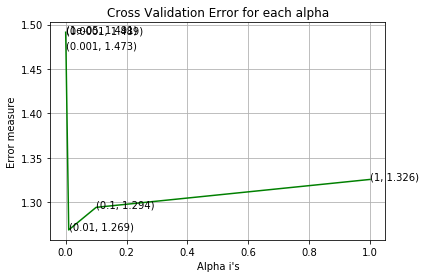

For values of best alpha =  0.01 The train log loss is: 0.7598148191815772
For values of best alpha =  0.01 The cross validation log loss is: 1.2689359374469482
For values of best alpha =  0.01 The test log loss is: 1.277667004524932


In [47]:
# Train a Logistic regression+Calibration model using text features whicha re on-hot encoded
alpha = [10 ** x for x in range(-5, 1)]

cv_log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_text_feature_ngrams, y_train)
    
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_text_feature_ngrams, y_train)
    predict_y = sig_clf.predict_proba(cv_text_feature_ngrams)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_text_feature_ngrams, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_text_feature_ngrams, y_train)

predict_y = sig_clf.predict_proba(train_text_feature_ngrams)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_text_feature_ngrams)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_text_feature_ngrams)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

<p style="font-size:18px;"> <b>Q.</b> Is the Text feature stable across all the data sets (Test, Train, Cross validation)?</p>
<p style="font-size:16px;"> <b>Ans.</b> Yes, it seems like! </p>

In [48]:
def get_intersec_text(df):
    df_text_vec = CountVectorizer(ngram_range=(1,2))
    df_text_fea = df_text_vec.fit_transform(df['TEXT'])
    df_text_features = df_text_vec.get_feature_names()

    df_text_fea_counts = df_text_fea.sum(axis=0).A1
    df_text_fea_dict = dict(zip(list(df_text_features),df_text_fea_counts))
    len1 = len(set(df_text_features))
    len2 = len(set(train_text_features) & set(df_text_features))
    return len1,len2

In [49]:
len1,len2 = get_intersec_text(test_df)
print(np.round((len2/len1)*100, 3), "% of word of test data appeared in train data")
len1,len2 = get_intersec_text(cv_df)
print(np.round((len2/len1)*100, 3), "% of word of Cross Validation appeared in train data")

73.432 % of word of test data appeared in train data
73.459 % of word of Cross Validation appeared in train data


<h3>3.2.4 Univariate Analysis on TopWordsInText Feature</h3>

1. How many unique words are present in train data?
2. How are word frequencies distributed?
3. How to featurize TopWordsInText field?
4. Is the TopWordsInText feature useful in predicitng y_i?
5. Is the TopWordsInText feature stable across train, test and CV datasets?

In [34]:
# cls_text is a data frame
# for every row in data frame consider the 'TEXT' column
# split the words by space
# make a dict with those words
# increment its count whenever we see that word

def extract_dictionary_paddle_topWords(cls_text):
    dictionary = defaultdict(int)
    for index, row in cls_text.iterrows():
        for word in row['TopWordsInText'].split():
            dictionary[word] +=1
    return dictionary

In [36]:
import math
#https://stackoverflow.com/a/1602964
def get_text_responsecoding_topWords(df):
    text_feature_responseCoding = np.zeros((df.shape[0],9))
    for i in range(0,9):
        row_index = 0
        for index, row in df.iterrows():
            sum_prob = 0
            for word in row['TopWordsInText'].split():
                sum_prob += math.log(((dict_list[i].get(word,0)+10 )/(total_dict.get(word,0)+90)))
            text_feature_responseCoding[row_index][i] = math.exp(sum_prob/len(row['TopWordsInText'].split()))
            row_index += 1
    return text_feature_responseCoding

In [37]:
# building a BOW text vectorizer with all the words
topWords_vectorizer = CountVectorizer(ngram_range=(1,2))
train_topWords_feature_ngrams = topWords_vectorizer.fit_transform(train_df['TopWordsInText'])
# getting all the feature names (words)
train_topWords_features= topWords_vectorizer.get_feature_names()

#Copy the train_topWords_feature_ngrams into a seperate variable
train_topWords_feature_ngrams_ones = train_topWords_feature_ngrams.copy()
train_topWords_feature_ngrams_ones.data = train_topWords_feature_ngrams_ones.data / train_topWords_feature_ngrams_ones.data

# train_topWords_feature_onehotCoding.sum(axis=0).A1 will sum every row and returns (1*number of features) vector
train_topWords_fea_counts=[]
col_sum= train_topWords_feature_ngrams_ones.sum(axis=0).A1

#Convert all the float values to integers
train_topWords_fea_counts = [int(col_sum[i]) for i in range(0,len(col_sum))]

# zip(list(topWords_features),topWords_fea_counts) will zip a word with its number of times it occured
topWords_fea_dict = dict(zip(list(train_topWords_features),train_topWords_fea_counts))

print("Total number of unique unigrams + bigrams in train data :", len(train_topWords_features))

Total number of unique unigrams + bigrams in train data : 75353


In [40]:
dict_list = []
# dict_list =[] contains 9 dictionaries each corresponds to a class
for i in range(1,10):
    cls_text = train_df[train_df['Class']==i]
    # build a word dict based on the words in that class
    dict_list.append(extract_dictionary_paddle_topWords(cls_text))
    # append it to dict_list

# dict_list[i] is build on i'th  class text data
# total_dict is buid on whole training text data
total_dict = extract_dictionary_paddle_topWords(train_df)


confuse_array = []
for i in train_topWords_features:
    ratios = []
    max_val = -1
    for j in range(0,9):
        ratios.append((dict_list[j][i]+10 )/(total_dict[i]+90))
    confuse_array.append(ratios)
confuse_array = np.array(confuse_array)

In [41]:
#response coding of text features
train_topWords_feature_responseCoding  = get_text_responsecoding_topWords(train_df)
test_topWords_feature_responseCoding  = get_text_responsecoding_topWords(test_df)
cv_topWords_feature_responseCoding  = get_text_responsecoding_topWords(cv_df)

In [42]:
# https://stackoverflow.com/a/16202486
# we convert each row values such that they sum to 1  
train_topWords_feature_responseCoding = (train_topWords_feature_responseCoding.T/train_topWords_feature_responseCoding.sum(axis=1)).T
test_topWords_feature_responseCoding = (test_topWords_feature_responseCoding.T/test_topWords_feature_responseCoding.sum(axis=1)).T
cv_topWords_feature_responseCoding = (cv_topWords_feature_responseCoding.T/cv_topWords_feature_responseCoding.sum(axis=1)).T

In [43]:
# don't forget to normalize every feature
train_topWords_feature_ngrams = normalize(train_topWords_feature_ngrams, axis=0)

# we use the same vectorizer that was trained on train data
test_topWords_feature_ngrams = topWords_vectorizer.transform(test_df['TopWordsInText'])
# don't forget to normalize every feature
test_topWords_feature_ngrams = normalize(test_topWords_feature_ngrams, axis=0)

# we use the same vectorizer that was trained on train data
cv_topWords_feature_ngrams = topWords_vectorizer.transform(cv_df['TopWordsInText'])
# don't forget to normalize every feature
cv_topWords_feature_ngrams = normalize(cv_topWords_feature_ngrams, axis=0)

In [44]:
#https://stackoverflow.com/a/2258273/4084039
sorted_topWords_fea_dict = dict(sorted(topWords_fea_dict.items(), key=lambda x: x[1] , reverse=True))
sorted_topWords_occur = np.array(list(sorted_topWords_fea_dict.values()))

In [45]:
# Number of words for a given frequency.
print(Counter(sorted_topWords_occur))

Counter({1: 49029, 2: 10383, 3: 5053, 4: 2917, 5: 1975, 6: 1039, 7: 771, 8: 569, 9: 567, 10: 270, 12: 258, 11: 232, 13: 204, 14: 163, 16: 140, 25: 124, 15: 106, 17: 94, 24: 79, 21: 67, 20: 66, 22: 65, 18: 65, 23: 57, 26: 54, 19: 52, 34: 44, 27: 41, 32: 34, 28: 30, 33: 28, 37: 26, 38: 24, 29: 24, 35: 23, 47: 21, 30: 21, 39: 19, 31: 19, 36: 18, 43: 17, 40: 17, 41: 13, 54: 11, 44: 11, 52: 10, 49: 10, 48: 10, 57: 9, 53: 9, 45: 9, 42: 9, 78: 8, 66: 8, 59: 8, 56: 8, 50: 8, 46: 8, 87: 7, 72: 7, 68: 7, 62: 7, 58: 7, 128: 6, 80: 6, 64: 6, 142: 5, 114: 5, 103: 5, 75: 5, 71: 5, 61: 5, 55: 5, 160: 4, 124: 4, 112: 4, 111: 4, 100: 4, 99: 4, 84: 4, 83: 4, 77: 4, 74: 4, 73: 4, 63: 4, 51: 4, 236: 3, 225: 3, 158: 3, 127: 3, 120: 3, 119: 3, 115: 3, 106: 3, 101: 3, 93: 3, 90: 3, 85: 3, 82: 3, 76: 3, 67: 3, 1119: 2, 437: 2, 387: 2, 279: 2, 277: 2, 275: 2, 239: 2, 216: 2, 215: 2, 204: 2, 202: 2, 198: 2, 191: 2, 182: 2, 167: 2, 166: 2, 162: 2, 159: 2, 148: 2, 140: 2, 139: 2, 138: 2, 137: 2, 135: 2, 133: 2, 1

For values of alpha =  1e-05 The log loss is: 1.4536212649964642
For values of alpha =  0.0001 The log loss is: 1.310673045996957
For values of alpha =  0.001 The log loss is: 1.1690689781568901
For values of alpha =  0.01 The log loss is: 1.180817445670301
For values of alpha =  0.1 The log loss is: 1.2538685218609866
For values of alpha =  1 The log loss is: 1.274241254281753


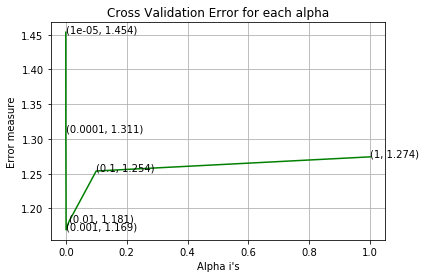

For values of best alpha =  0.001 The train log loss is: 0.45868466969679045
For values of best alpha =  0.001 The cross validation log loss is: 1.1690689781568901
For values of best alpha =  0.001 The test log loss is: 1.1801179862586852


In [46]:
# Train a Logistic regression+Calibration model using text features whicha re on-hot encoded
alpha = [10 ** x for x in range(-5, 1)]

cv_log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_topWords_feature_ngrams, y_train)
    
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_topWords_feature_ngrams, y_train)
    predict_y = sig_clf.predict_proba(cv_topWords_feature_ngrams)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_topWords_feature_ngrams, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_topWords_feature_ngrams, y_train)

predict_y = sig_clf.predict_proba(train_topWords_feature_ngrams)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_topWords_feature_ngrams)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_topWords_feature_ngrams)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

<p style="font-size:18px;"> <b>Q.</b> Is the TopWordsInText feature stable across all the data sets (Test, Train, Cross validation)?</p>
<p style="font-size:16px;"> <b>Ans.</b> Yes, it seems like! </p>

In [51]:
def get_intersec_topWords(df):
    df_topWords_vec = CountVectorizer(ngram_range=(1,2))
    df_topWords_fea = df_topWords_vec.fit_transform(df['TopWordsInText'])
    df_topWords_features = df_topWords_vec.get_feature_names()

    df_topWords_fea_counts = df_topWords_fea.sum(axis=0).A1
    df_topWords_fea_dict = dict(zip(list(df_topWords_features),df_topWords_fea_counts))
    len1 = len(set(df_topWords_features))
    len2 = len(set(train_topWords_features) & set(df_topWords_features))
    return len1,len2

In [54]:
len1,len2 = get_intersec_topWords(test_df)
print(np.round((len2/len1)*100, 3), "% of word of Test data appeared in train data")
len1,len2 = get_intersec_topWords(cv_df)
print(np.round((len2/len1)*100, 3), "% of word of Cross Validation appeared in train data")

56.297 % of word of Test data appeared in train data
60.642 % of word of Cross Validation appeared in train data


<h3>3.2.4 Feature Engineering with only Gene and Variants data</h3>

In [56]:
#Here we will build a list which would contain all the gene and variation data into one single list.
#We will use this list to featurize our main text data. In another section, we will use the text in TopWordsInText feature to
#featurize the text data. For now let's stick to gene and variation data and buil ML models on top of it.
gene_var = []

for gene in result['Gene'].values:
    gene_var.append(gene)

for variation in result['Variation'].values:
    gene_var.append(variation)

In [ ]:
tfidfVectorizer = TfidfVectorizer(max_features=1000).fit_transform(gene_var)
gene_vari_features = tfidfVectorizer.get_feature_names()

train_text_gene_var_encoding = tfidfVectorizer.transform(train_df['TEXT'])
test_text_gene_var_encoding = tfidfVectorizer.transform(test_df['TEXT'])
cv_text_gene_var_encoding = tfidfVectorizer.transform(cv_df['TEXT'])

<h1>4. Machine Learning Models</h1>

In [61]:
#Data preparation for ML models.
#Misc. functionns for ML models

def predict_and_plot_confusion_matrix(train_x, train_y,test_x, test_y, clf):
    clf.fit(train_x, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x, train_y)
    pred_y = sig_clf.predict(test_x)

    # for calculating log_loss we willl provide the array of probabilities belongs to each class
    print("Log loss :",log_loss(test_y, sig_clf.predict_proba(test_x)))
    # calculating the number of data points that are misclassified
    print("Percentage of mis-classified points :", 100*np.count_nonzero((pred_y- test_y))/test_y.shape[0])
    plot_confusion_matrix(test_y, pred_y)

In [51]:
def report_log_loss(train_x, train_y, test_x, test_y,  clf):
    clf.fit(train_x, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x, train_y)
    sig_clf_probs = sig_clf.predict_proba(test_x)
    return log_loss(test_y, sig_clf_probs, eps=1e-15)

<p style="font-size:24px;text-align:Center"> <b>Stacking the three types of features </b><p>

In [53]:
# merging gene, variance and text features

# building train, test and cross validation data sets
# a = [[1, 2], 
#      [3, 4]]
# b = [[4, 5], 
#      [6, 7]]
# hstack(a, b) = [[1, 2, 4, 5],
#                [ 3, 4, 6, 7]]

train_gene_var_ngrams = hstack((train_gene_feature_ngrams,train_variation_feature_ngrams))
test_gene_var_ngrams = hstack((test_gene_feature_ngrams,test_variation_feature_ngrams))
cv_gene_var_ngrams = hstack((cv_gene_feature_ngrams,cv_variation_feature_ngrams))

train_x_ngrams = hstack((train_gene_var_ngrams, train_text_feature_ngrams)).tocsr()
train_y = np.array(list(train_df['Class']))

test_x_ngrams = hstack((test_gene_var_ngrams, test_text_feature_ngrams)).tocsr()
test_y = np.array(list(test_df['Class']))

cv_x_ngrams = hstack((cv_gene_var_ngrams, cv_text_feature_ngrams)).tocsr()
cv_y = np.array(list(cv_df['Class']))


train_gene_var_responseCoding = np.hstack((train_gene_feature_responseCoding,train_variation_feature_responseCoding))
test_gene_var_responseCoding = np.hstack((test_gene_feature_responseCoding,test_variation_feature_responseCoding))
cv_gene_var_responseCoding = np.hstack((cv_gene_feature_responseCoding,cv_variation_feature_responseCoding))

train_x_responseCoding = np.hstack((train_gene_var_responseCoding, train_text_feature_responseCoding))
test_x_responseCoding = np.hstack((test_gene_var_responseCoding, test_text_feature_responseCoding))
cv_x_responseCoding = np.hstack((cv_gene_var_responseCoding, cv_text_feature_responseCoding))

In [54]:
print("BOW(n_grams = 1,2) features representation:\n")
print("(Number of data points * number of features) in train data = ", train_x_ngrams.shape)
print("(Number of data points * number of features) in test data = ", test_x_ngrams.shape)
print("(Number of data points * number of features) in cross validation data =", cv_x_ngrams.shape)

BOW(n_grams = 1,2) features representation:

(Number of data points * number of features) in train data =  (2124, 2364918)
(Number of data points * number of features) in test data =  (665, 2364918)
(Number of data points * number of features) in cross validation data = (532, 2364918)


In [55]:
print(" Response encoding features :\n")
print("(Number of data points * number of features) in train data = ", train_x_responseCoding.shape)
print("(Number of data points * number of features) in test data = ", test_x_responseCoding.shape)
print("(Number of data points * number of features) in cross validation data =", cv_x_responseCoding.shape)

 Response encoding features :

(Number of data points * number of features) in train data =  (2124, 27)
(Number of data points * number of features) in test data =  (665, 27)
(Number of data points * number of features) in cross validation data = (532, 27)


<h2>4.3.1 Logistic Regression With Class balancing</h2>

<h4>4.3.1.1. Hyperparameter tuning</h4>

for alpha = 1e-06
Log Loss : 1.5507962982043606
for alpha = 1e-05
Log Loss : 1.5574692532467123
for alpha = 0.0001
Log Loss : 1.541812402343388
for alpha = 0.001
Log Loss : 1.4995155091305106
for alpha = 0.01
Log Loss : 1.2501309862948178
for alpha = 0.1
Log Loss : 1.2702929185519398
for alpha = 1
Log Loss : 1.3003345704918075
for alpha = 10
Log Loss : 1.3504027199342965
for alpha = 100
Log Loss : 1.3710652999098063


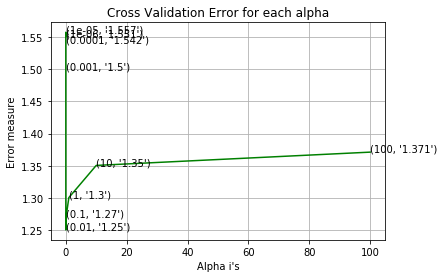

For values of best alpha =  0.01 The train log loss is: 0.7462651006935817
For values of best alpha =  0.01 The cross validation log loss is: 1.2501309862948178
For values of best alpha =  0.01 The test log loss is: 1.250034641514856


In [56]:
alpha = [10 ** x for x in range(-6, 3)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(class_weight='balanced', alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_x_ngrams, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_ngrams, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_ngrams)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_ngrams, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_ngrams, train_y)

predict_y = sig_clf.predict_proba(train_x_ngrams)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_ngrams)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_ngrams)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

<h4>4.3.1.2. Testing the model with best hyper paramters</h4>

Log loss : 1.2135678532698875
Percentage of mis-classified points : 40.78947368421053
-------------------- Confusion matrix --------------------


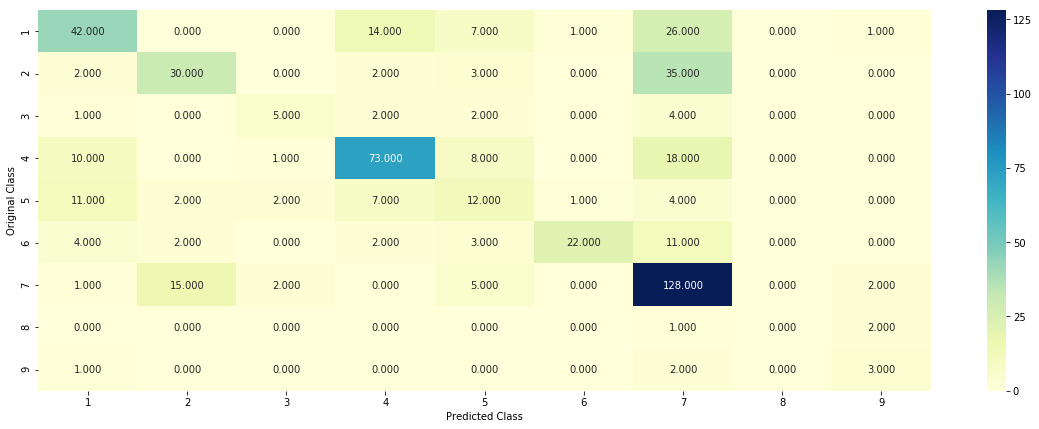

-------------------- Precision matrix (Columm Sum=1) --------------------


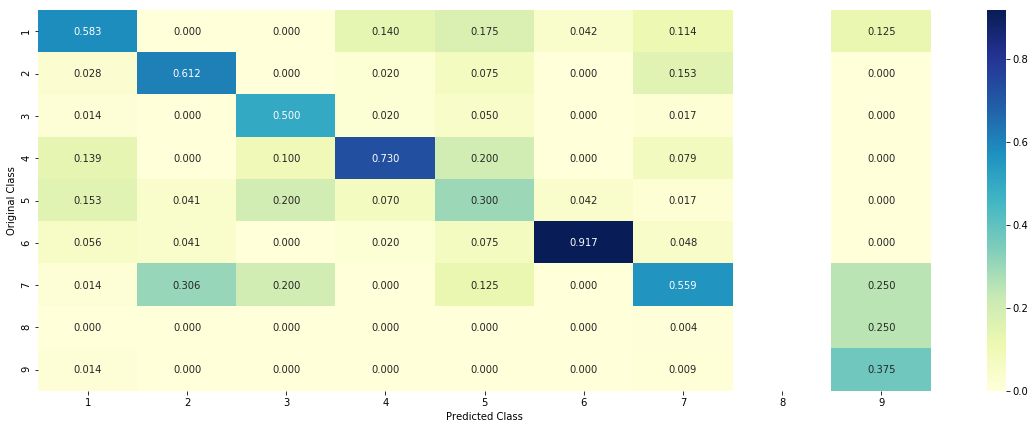

-------------------- Recall matrix (Row sum=1) --------------------


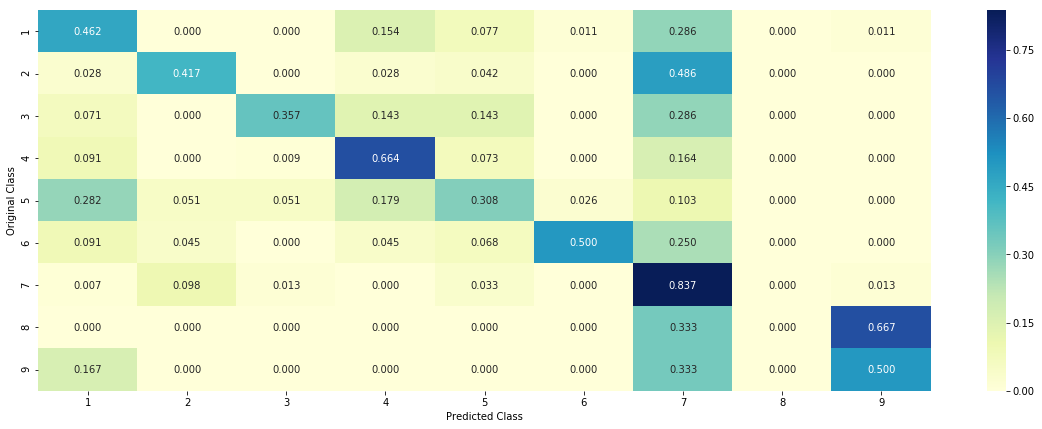

In [66]:
#clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
predict_and_plot_confusion_matrix(train_x_ngrams, train_y, cv_x_ngrams, cv_y, sig_clf)

<h4>4.3.1.3. Feature Importance</h4>

In [117]:
gene_count_vec = CountVectorizer(ngram_range=(1,2))
var_count_vec = CountVectorizer(ngram_range=(1,2))
text_count_vec = CountVectorizer(ngram_range=(1,2))

gene_vec = gene_count_vec.fit(train_df['Gene'])
var_vec  = var_count_vec.fit(train_df['Variation'])
text_vec = text_count_vec.fit(train_df['TEXT'])
fea1_len = len(gene_vec.get_feature_names())
fea2_len = len(var_count_vec.get_feature_names())
fea1_len

233

In [119]:
fea2_len

2056

In [67]:
# for the given indices, we will print the name of the features
# and we will check whether the feature present in the test point text or not
def get_impfeature_names(indices, text, gene, var, no_features):
    gene_count_vec = CountVectorizer(ngram_range=(1,2))
    var_count_vec = CountVectorizer(ngram_range=(1,2))
    text_count_vec = CountVectorizer(ngram_range=(1,2))
    
    gene_vec = gene_count_vec.fit(train_df['Gene'])
    var_vec  = var_count_vec.fit(train_df['Variation'])
    text_vec = text_count_vec.fit(train_df['TEXT'])
    
    fea1_len = len(gene_vec.get_feature_names()) #233
    fea2_len = len(var_count_vec.get_feature_names()) #2056
    
    word_present = 0
    for i,v in enumerate(indices):
        if (v < fea1_len):
            word = gene_vec.get_feature_names()[v]
            yes_no = True if word == gene else False
            if yes_no:
                word_present += 1
                print(i, "Gene feature [{}] present in test data point [{}]".format(word,yes_no))
        elif (v < fea1_len+fea2_len):
            word = var_vec.get_feature_names()[v-(fea1_len)]
            yes_no = True if word == var else False
            if yes_no:
                word_present += 1
                print(i, "variation feature [{}] present in test data point [{}]".format(word,yes_no))
        else:
            word = text_vec.get_feature_names()[v-(fea1_len+fea2_len)]
            yes_no = True if word in text.split() else False
            if yes_no:
                word_present += 1
                print(i, "Text feature [{}] present in test data point [{}]".format(word,yes_no))

    print("Out of the top ",no_features," features ", word_present, "are present in query point")

<h5>4.3.1.3.1. Correctly Classified point</h5>

In [122]:
test_point_index = 55
no_feature = 5000
predicted_cls = sig_clf.predict(test_x_ngrams[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_ngrams[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
#get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 7
Predicted Class Probabilities: [[0.0917 0.0706 0.012  0.0687 0.0368 0.0237 0.6888 0.0036 0.004 ]]
Actual Class : 7
--------------------------------------------------


<h5>4.3.1.3.2. Incorrectly Classified point</h5>

In [73]:
test_point_index = 1
no_feature = 5000
predicted_cls = sig_clf.predict(test_x_ngrams[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_ngrams[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 7
Predicted Class Probabilities: [[0.0319 0.0019 0.0062 0.0111 0.0126 0.004  0.9234 0.0046 0.0043]]
Actual Class : 2
--------------------------------------------------


<h2>4.3.2 Logistic Regression Without Class balancing</h2>

<h4>4.3.2.1. Hyper paramter tuning</h4>

for alpha = 1e-06
Log Loss : 1.507948803787281
for alpha = 1e-05
Log Loss : 1.5101009495762914
for alpha = 0.0001
Log Loss : 1.495701978727535
for alpha = 0.001
Log Loss : 1.4790303612474258
for alpha = 0.01
Log Loss : 1.2652506481375811
for alpha = 0.1
Log Loss : 1.2905828012502156
for alpha = 1
Log Loss : 1.3220584787281902


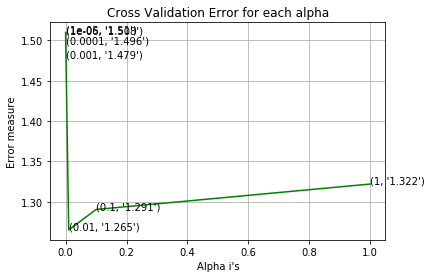

For values of best alpha =  0.01 The train log loss is: 0.7422312510667094
For values of best alpha =  0.01 The cross validation log loss is: 1.2652506481375811
For values of best alpha =  0.01 The test log loss is: 1.2766745775786867


In [74]:
alpha = [10 ** x for x in range(-6, 1)]

cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_x_ngrams, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_ngrams, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_ngrams)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_ngrams, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_ngrams, train_y)

predict_y = sig_clf.predict_proba(train_x_ngrams)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_ngrams)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_ngrams)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

<h4>4.3.2.2. Testing model with best hyper parameters</h4>

Log loss : 1.226452619392822
Percentage of mis-classified points : 39.473684210526315
-------------------- Confusion matrix --------------------


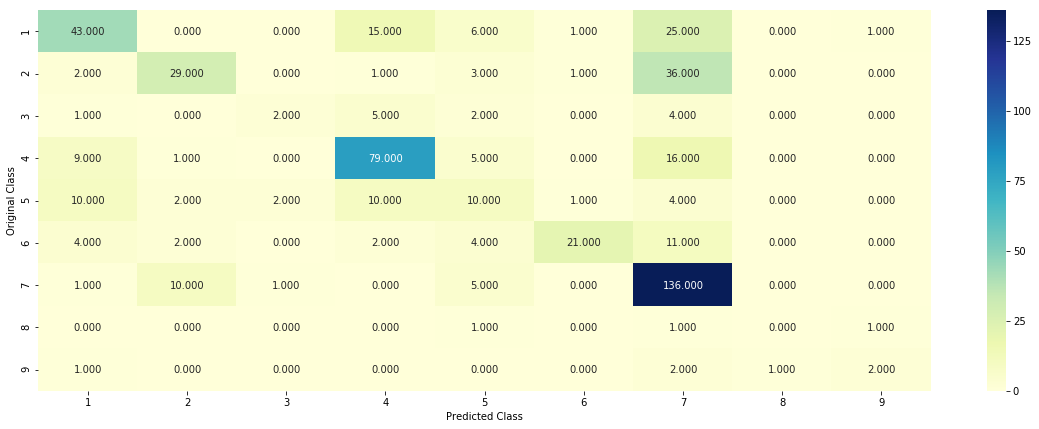

-------------------- Precision matrix (Columm Sum=1) --------------------


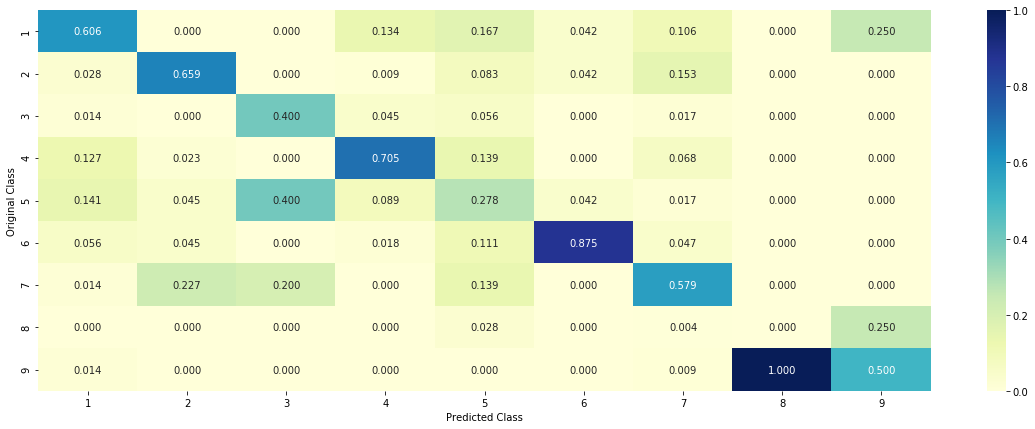

-------------------- Recall matrix (Row sum=1) --------------------


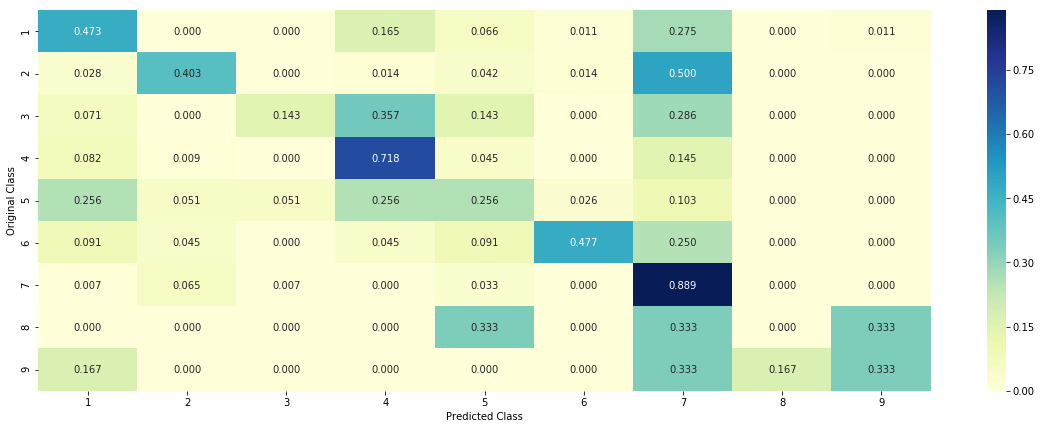

In [75]:
predict_and_plot_confusion_matrix(train_x_ngrams, train_y, cv_x_ngrams, cv_y, sig_clf)

<h4>4.3.2.3. Feature Importance, Correctly Classified point</h4>

In [76]:
test_point_index = 1
no_feature = 500
predicted_cls = sig_clf.predict(test_x_ngrams[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_ngrams[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 7
Predicted Class Probabilities: [[3.500e-02 2.800e-03 1.500e-03 1.770e-02 9.800e-03 2.300e-03 9.288e-01
  1.200e-03 8.000e-04]]
Actual Class : 2
--------------------------------------------------
Out of the top  500  features  0 are present in query point


<h4>4.3.2.4. Feature Importance, Incorrectly Classified point</h4>

In [77]:
test_point_index = 4
no_feature = 500
predicted_cls = sig_clf.predict(test_x_ngrams[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_ngrams[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 1
Predicted Class Probabilities: [[0.3183 0.1043 0.0114 0.2137 0.189  0.0243 0.1307 0.0042 0.0042]]
Actual Class : 5
--------------------------------------------------
Out of the top  500  features  0 are present in query point


<h1>5. Assignments</h1>

<ol>
    <li> Apply All the models with tf-idf features (Replace CountVectorizer with tfidfVectorizer and run the same cells)</li>
    <li> Instead of using all the words in the dataset, use only the top 1000 words based of tf-idf values</li>
    <li>Apply Logistic regression with CountVectorizer Features, including both unigrams and bigrams</li>
    <li> Try any of the feature engineering techniques discussed in the course to reduce the CV and test log-loss to a value less than 1.0</li>
</ol>